<a href="https://colab.research.google.com/github/Sumanth-Sridhar-Rao/Research-Project-Stock-Index/blob/master/Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing essential libraries***

In [0]:
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn')
%matplotlib inline

# ***Downloading and Installing PyDrive module***

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

### ***User Authentication***

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [100]:
link = "https://drive.google.com/open?id=1FkuIaws9lcfMCSbJRSfENsjWNH7nbef6"

href, id = link.split('=')
print(id)

1FkuIaws9lcfMCSbJRSfENsjWNH7nbef6


# ***Importing S&P BSE SENSEX historical data***

In [101]:
downld = drive.CreateFile({'id':id}) 
downld.GetContentFile('BSESN.csv')  
BSESN_df = pd.read_csv('BSESN.csv', parse_dates= True, index_col='Date')
print(BSESN_df.head())
print(BSESN_df.describe())
print(BSESN_df.shape)

                   Open         High  ...    Adj Close  Volume
Date                                  ...                     
1997-07-01  4263.109863  4301.770020  ...  4300.859863     0.0
1997-07-02  4302.959961  4395.310059  ...  4333.899902     0.0
1997-07-03  4335.790039  4393.290039  ...  4323.459961     0.0
1997-07-04  4332.700195  4347.589844  ...  4323.819824     0.0
1997-07-07  4326.810059  4391.009766  ...  4291.450195     0.0

[5 rows x 6 columns]
               Open          High  ...     Adj Close        Volume
count   5582.000000   5582.000000  ...   5582.000000  5.582000e+03
mean   15685.656341  15779.796819  ...  15667.628942  6.997603e+04
std    11079.945530  11115.646767  ...  11063.975176  1.002138e+06
min     2621.889893   2682.590088  ...   2600.120117  0.000000e+00
25%     4715.932373   4758.972657  ...   4697.845092  0.000000e+00
50%    15335.559570  15444.165039  ...  15295.495117  1.180000e+04
75%    24357.097168  24522.072266  ...  24295.369629  1.880000e+04
m

# ***Exploratory Data Analysis***

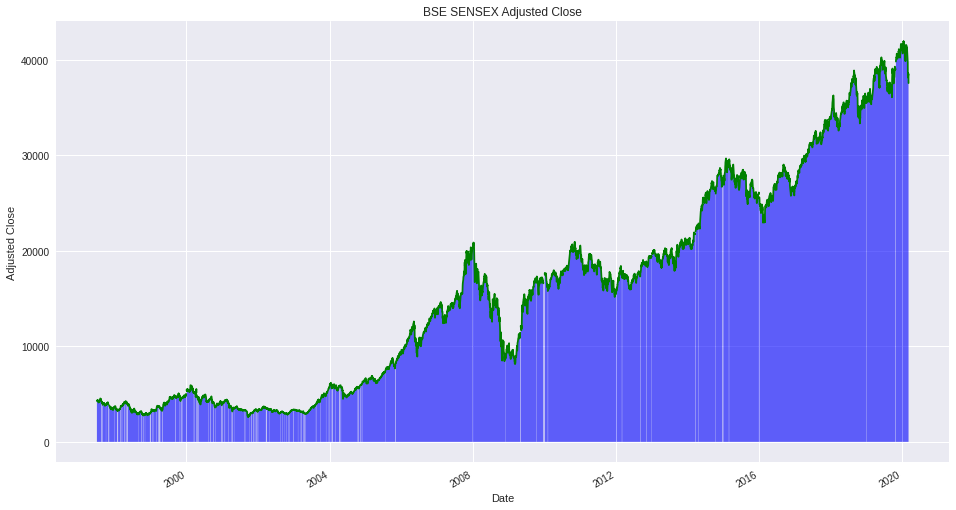

In [102]:
plt.rcParams["figure.figsize"] = [16,9]
BSESN_df['Adj Close'].plot(style = 'g-')
plt.fill_between(BSESN_df.index, BSESN_df['Adj Close'], facecolor='b', alpha=0.6)
plt.title('BSE SENSEX Adjusted Close')
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.show()

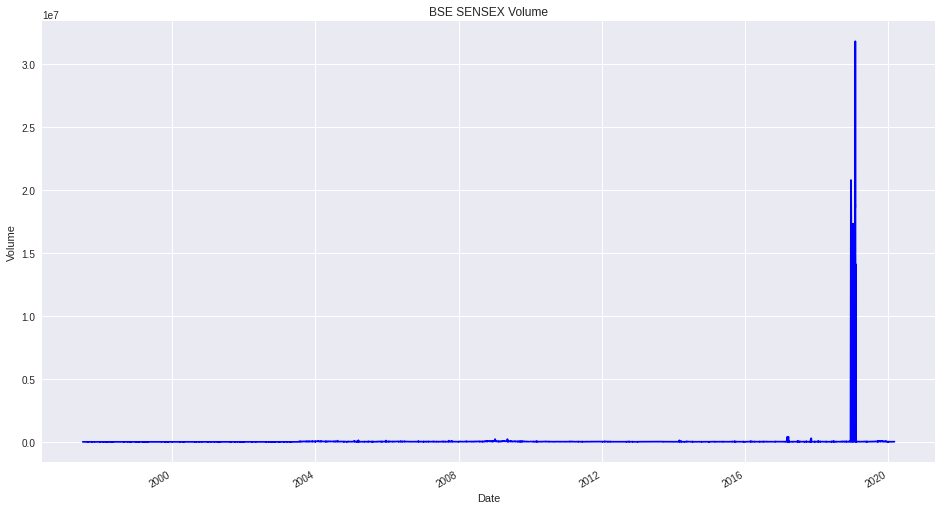

In [103]:
BSESN_df.Volume.plot(style = 'b-')
plt.title('BSE SENSEX Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

Text(0.5, 1.0, 'Volume-Frequency Histogram')

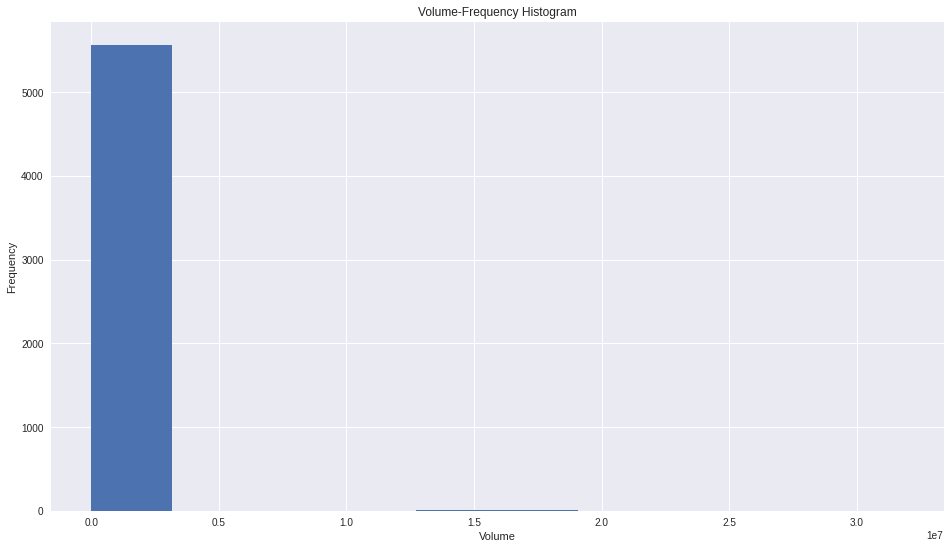

In [104]:
BSESN_df.Volume.plot.hist()
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Volume-Frequency Histogram')

Text(0.5, 1.0, 'Close Price-Frequency Histogram')

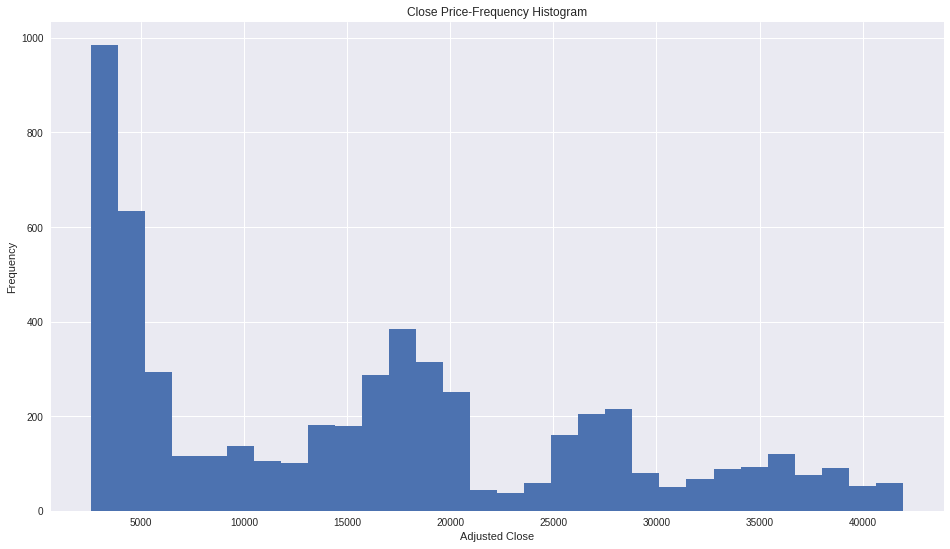

In [105]:
BSESN_df['Adj Close'].plot.hist(bins = 30)
plt.xlabel('Adjusted Close')
plt.ylabel('Frequency')
plt.title('Close Price-Frequency Histogram')

### ***Checking for Outliers***

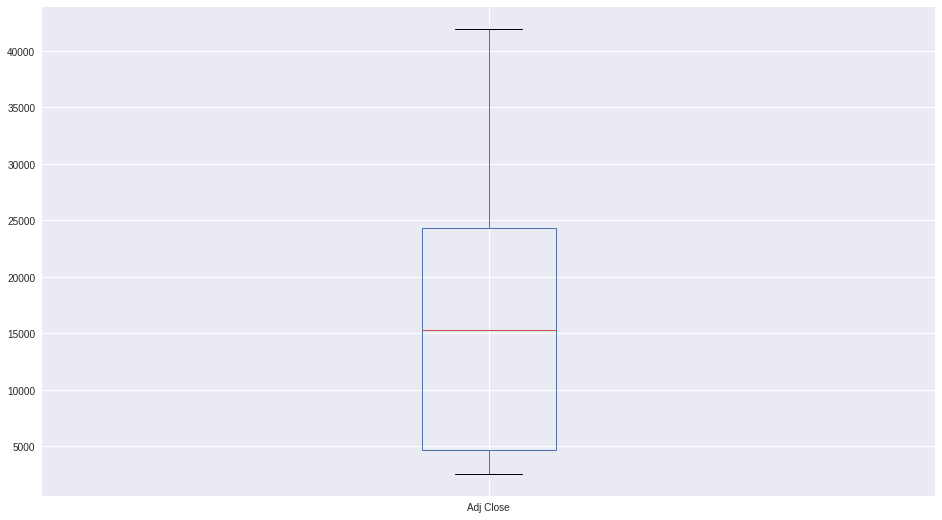

In [106]:
BSESN_df['Adj Close'].plot(kind = 'box')

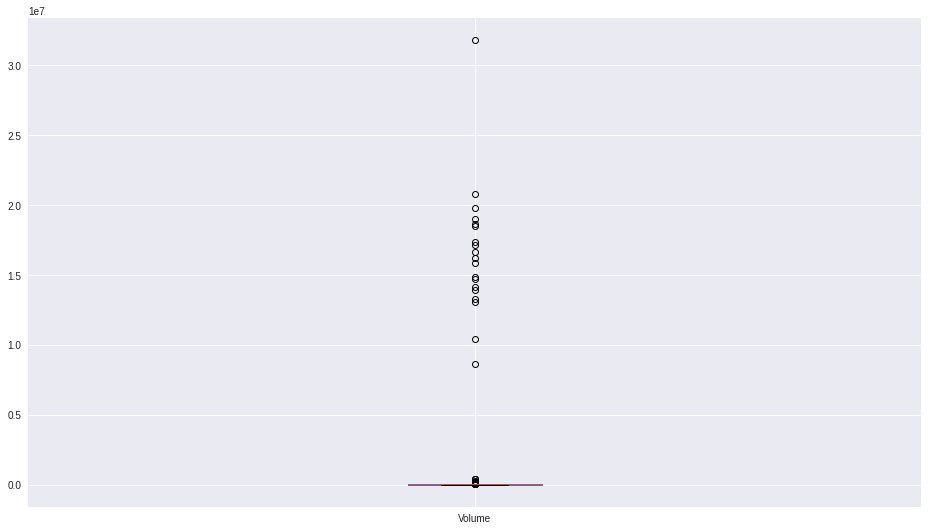

In [107]:
BSESN_df['Volume'].plot(kind = 'box')

In [108]:
print(BSESN_df['Volume'].value_counts()) 

BSESN_df['Volume'] = BSESN_df['Volume'].replace(0, 800.000000)

print(BSESN_df['Volume'].value_counts()) 

0.0           1490
14600.0         51
11400.0         49
12200.0         49
11000.0         46
              ... 
49000.0          1
39100.0          1
31815100.0       1
400800.0         1
57400.0          1
Name: Volume, Length: 448, dtype: int64
800.0         1491
14600.0         51
12200.0         49
11400.0         49
11000.0         46
              ... 
19766300.0       1
69200.0          1
55500.0          1
52800.0          1
57400.0          1
Name: Volume, Length: 447, dtype: int64


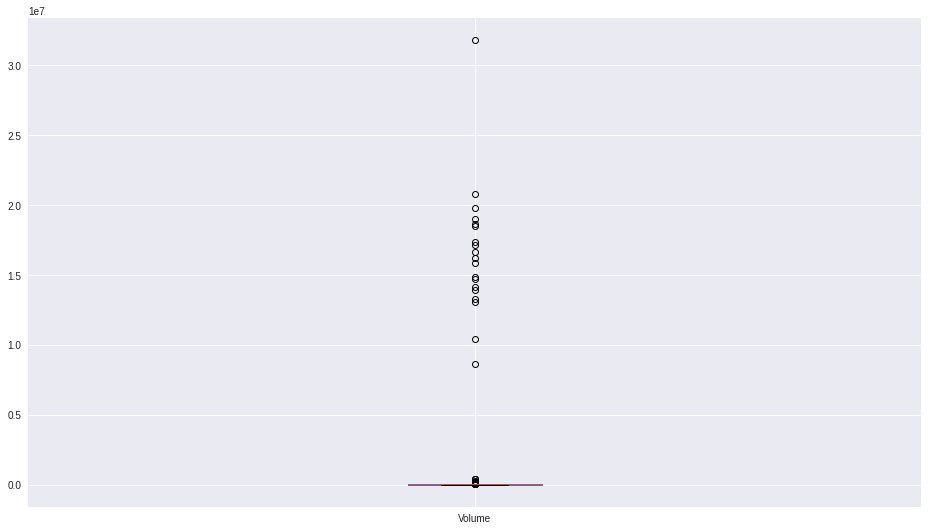

In [109]:
BSESN_df.Volume.plot(kind = 'box')

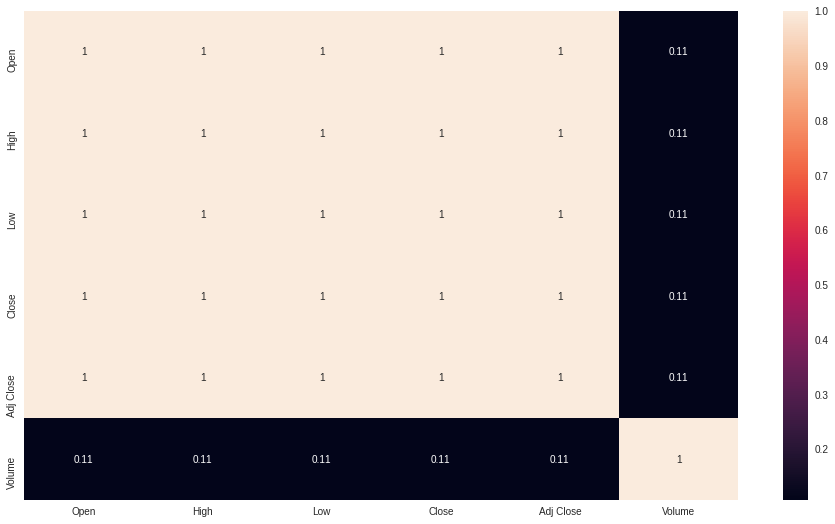

In [110]:
sns.heatmap(BSESN_df.corr(), annot=True)

# ***Data Preprocessing***

In [111]:
print(BSESN_df.isna().sum())

Open         127
High         127
Low          127
Close        127
Adj Close    127
Volume       127
dtype: int64


In [0]:
BSESN_df = BSESN_df.dropna()
BSESN_df = BSESN_df.drop('Close', axis = 1)

In [113]:
BSESN_df.isna().sum()

Open         0
High         0
Low          0
Adj Close    0
Volume       0
dtype: int64

In [114]:
BSESN_df.shape

(5582, 5)

## ***Feature Engineering***

In [0]:
BSESN_df['HL_Ratio'] = (BSESN_df['High'] / BSESN_df['Low'])
BSESN_df['OpCl_Ratio'] = (BSESN_df['Open'] / BSESN_df['Adj Close'])
BSESN_df['HL_Diff'] = (BSESN_df['High'] - BSESN_df['Low'])
BSESN_df['OpCl_Diff'] = (BSESN_df['Open'] - BSESN_df['Adj Close'])

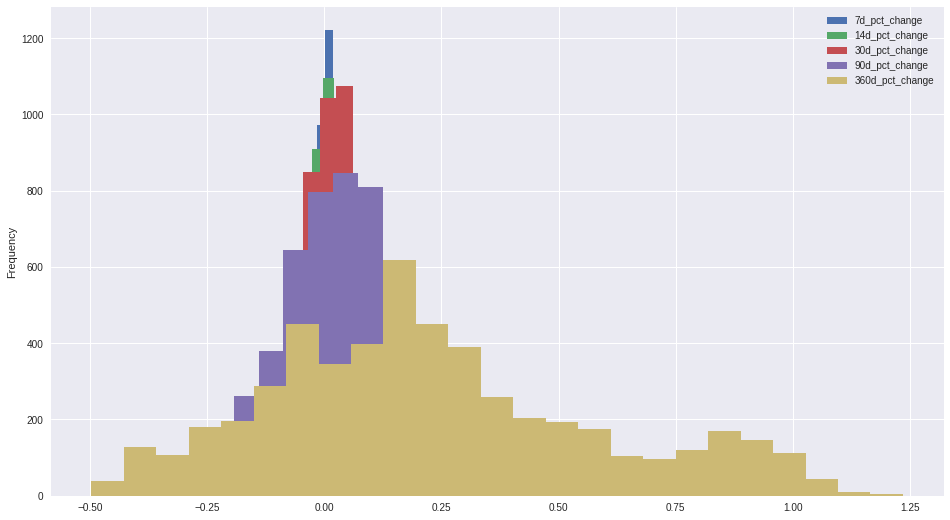

In [116]:
BSESN_df['7d_pct_change'] = BSESN_df['Adj Close'].pct_change(7)
BSESN_df['14d_pct_change'] = BSESN_df['Adj Close'].pct_change(14)
BSESN_df['30d_pct_change'] = BSESN_df['Adj Close'].pct_change(30)
BSESN_df['90d_pct_change'] = BSESN_df['Adj Close'].pct_change(90)
BSESN_df['360d_pct_change'] = BSESN_df['Adj Close'].pct_change(360)

BSESN_df['7d_pct_change'].plot.hist(bins = 25)
BSESN_df['14d_pct_change'].plot.hist(bins = 25)
BSESN_df['30d_pct_change'].plot.hist(bins = 25)
BSESN_df['90d_pct_change'].plot.hist(bins = 25)
BSESN_df['360d_pct_change'].plot.hist(bins = 25)
plt.legend()

***Percentage Change Feature Correlation***

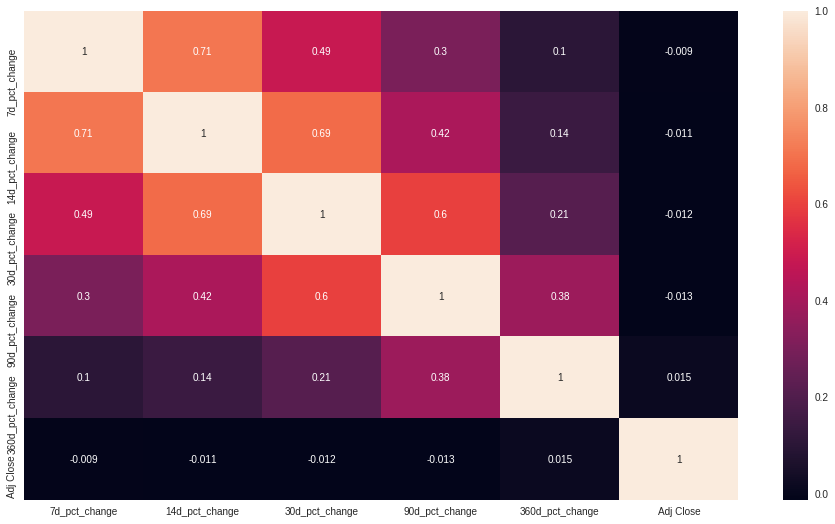

In [117]:
pct_change_df = BSESN_df[['7d_pct_change', '14d_pct_change', '30d_pct_change', '90d_pct_change', '360d_pct_change', 'Adj Close']]
pct_change_df = pct_change_df.dropna()
sns.heatmap(pct_change_df.corr(), annot=True)

In [118]:
BSESN_df.isna().sum()

Open                 0
High                 0
Low                  0
Adj Close            0
Volume               0
HL_Ratio             0
OpCl_Ratio           0
HL_Diff              0
OpCl_Diff            0
7d_pct_change        7
14d_pct_change      14
30d_pct_change      30
90d_pct_change      90
360d_pct_change    360
dtype: int64

In [119]:
droplist = ['7d_pct_change', '14d_pct_change', '30d_pct_change', '90d_pct_change', '360d_pct_change']
BSESN_df = BSESN_df.drop(droplist, axis = 1)
BSESN_df.isna().sum()

Open          0
High          0
Low           0
Adj Close     0
Volume        0
HL_Ratio      0
OpCl_Ratio    0
HL_Diff       0
OpCl_Diff     0
dtype: int64

In [120]:
BSESN_df['30d_future_close'] = BSESN_df['Adj Close'].shift(-30)
BSESN_df['30d_future_pct_change'] = BSESN_df['30d_future_close'].pct_change(30)
print(BSESN_df.head()); print(BSESN_df.isna().sum()) ; print(BSESN_df.shape)

                   Open         High  ...  30d_future_close  30d_future_pct_change
Date                                  ...                                         
1997-07-01  4263.109863  4301.770020  ...       4425.029785                    NaN
1997-07-02  4302.959961  4395.310059  ...       4370.129883                    NaN
1997-07-03  4335.790039  4393.290039  ...       4320.970215                    NaN
1997-07-04  4332.700195  4347.589844  ...       4165.370117                    NaN
1997-07-07  4326.810059  4391.009766  ...       4234.629883                    NaN

[5 rows x 11 columns]
Open                      0
High                      0
Low                       0
Adj Close                 0
Volume                    0
HL_Ratio                  0
OpCl_Ratio                0
HL_Diff                   0
OpCl_Diff                 0
30d_future_close         30
30d_future_pct_change    30
dtype: int64
(5582, 11)


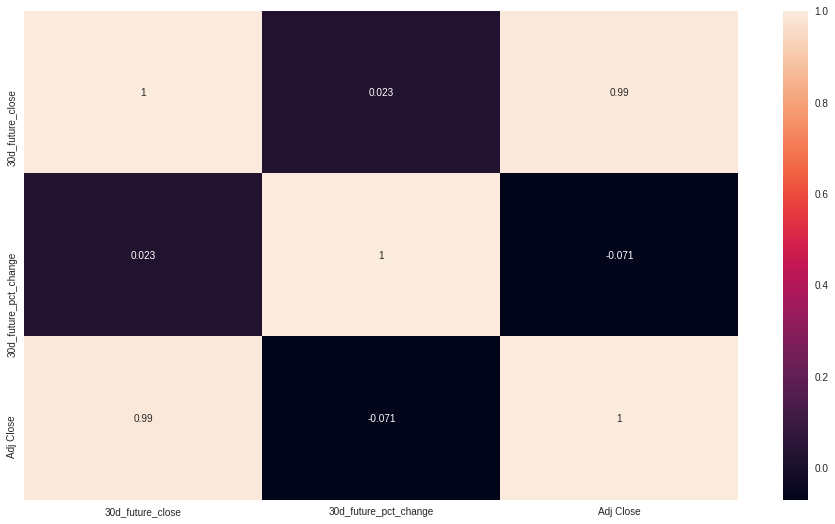

In [121]:
future_close = BSESN_df[['30d_future_close', '30d_future_pct_change', 'Adj Close']]
sns.heatmap(future_close.corr(), annot=True)

In [0]:
BSESN_df = BSESN_df.drop('30d_future_pct_change', axis = 1)

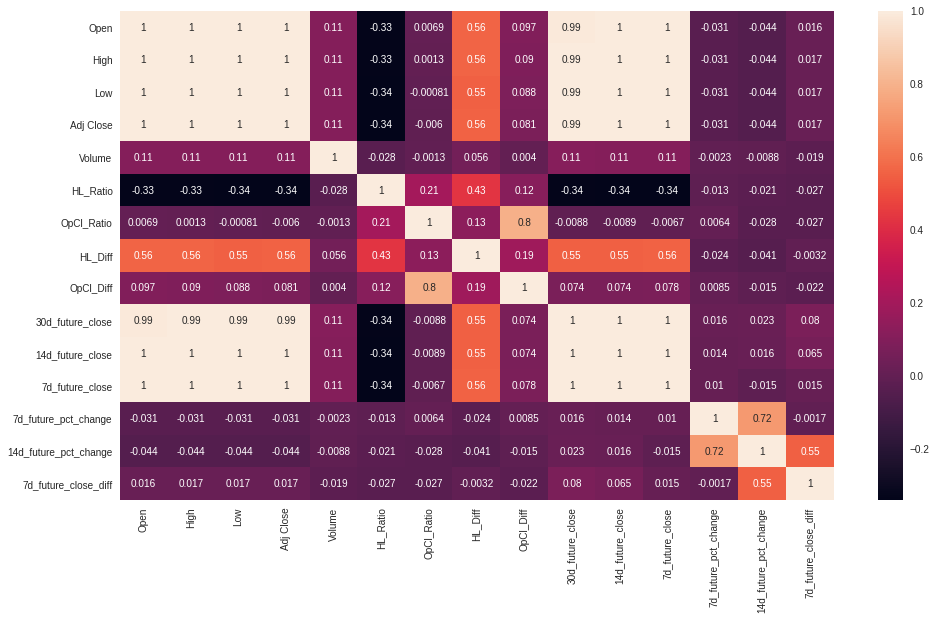

In [123]:
BSESN_df['14d_future_close'] = BSESN_df['Adj Close'].shift(-14)
BSESN_df['7d_future_close'] = BSESN_df['Adj Close'].shift(-7)

BSESN_df['7d_future_pct_change'] = BSESN_df['7d_future_close'].pct_change(7)
BSESN_df['14d_future_pct_change'] = BSESN_df['14d_future_close'].pct_change(14)
BSESN_df['7d_future_close_diff'] = (BSESN_df['14d_future_close'] - BSESN_df['7d_future_close'])

sns.heatmap(BSESN_df.corr(), annot = True)

In [0]:
BSESN_df = BSESN_df.drop(['HL_Ratio', 'OpCl_Ratio'], axis = 1)
BSESN_df = BSESN_df.drop(['7d_future_close', '14d_future_close'], axis = 1)

In [125]:
BSESN_df = BSESN_df.dropna()
print(BSESN_df.isna().sum())

Open                     0
High                     0
Low                      0
Adj Close                0
Volume                   0
HL_Diff                  0
OpCl_Diff                0
30d_future_close         0
7d_future_pct_change     0
14d_future_pct_change    0
7d_future_close_diff     0
dtype: int64


***ACF and PACF plots***

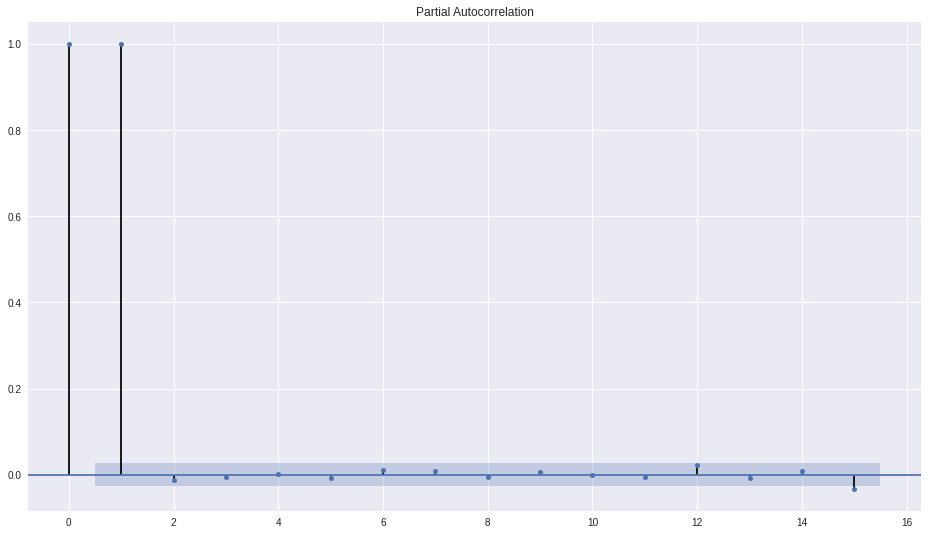

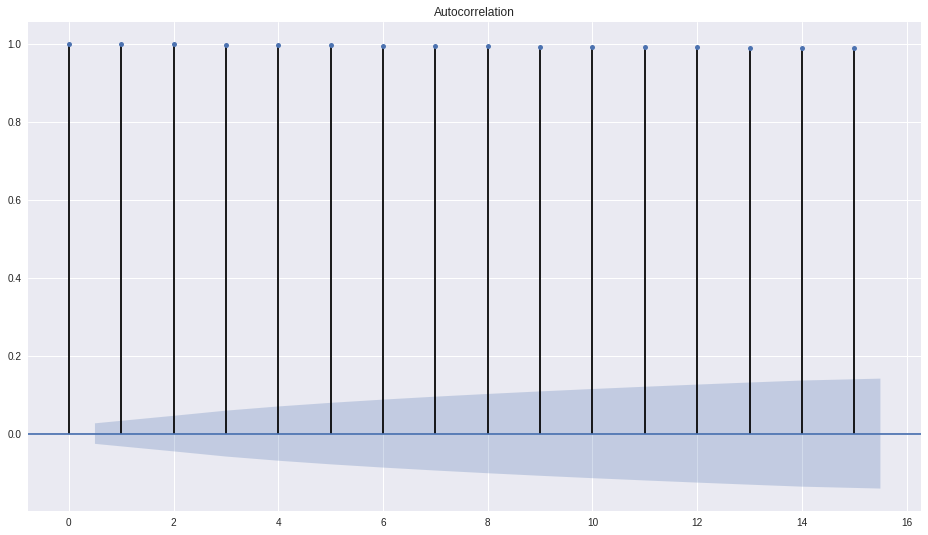

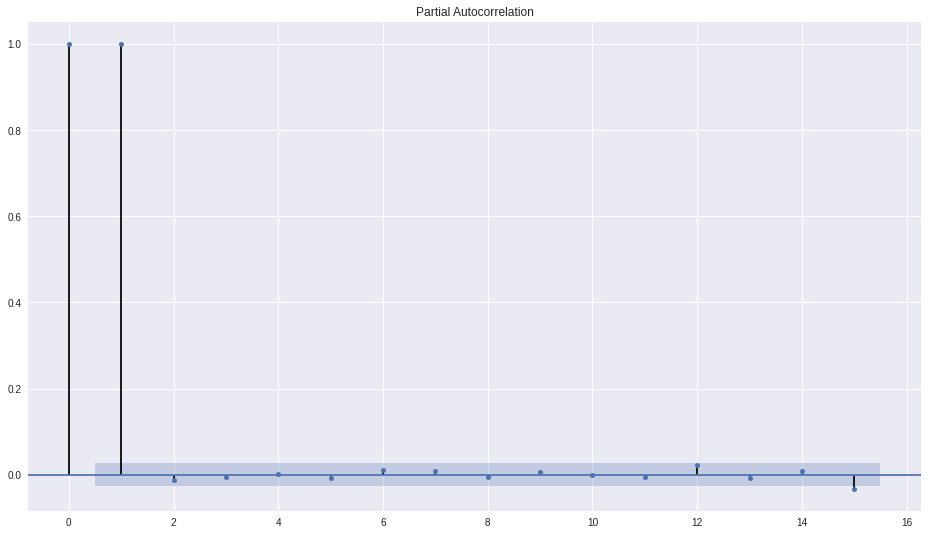

In [126]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(BSESN_df['Adj Close'], lags = 15)
plot_pacf(BSESN_df['Adj Close'], lags = 15)

***All Feature Correlations***

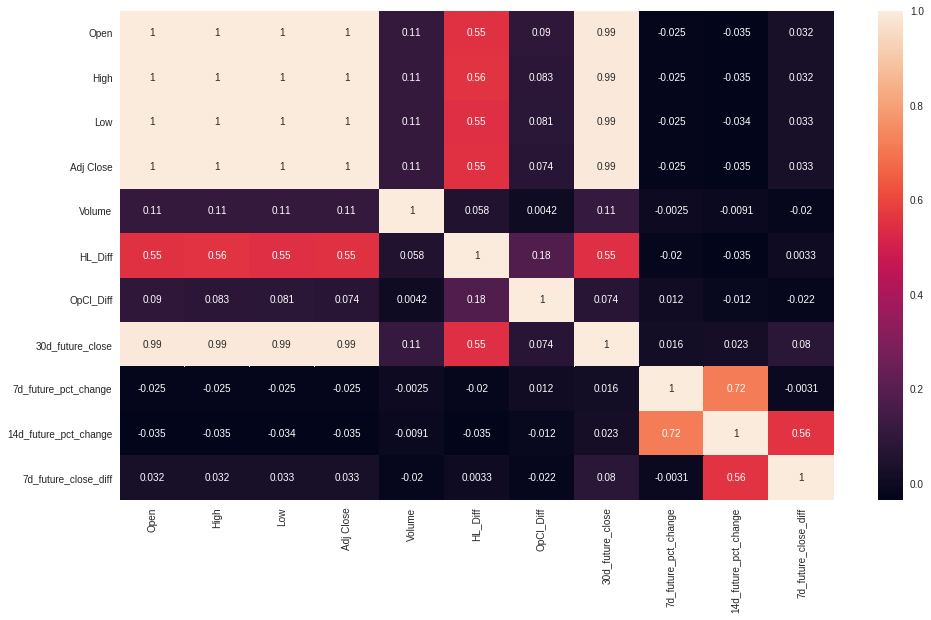

In [127]:
sns.heatmap(BSESN_df.corr(), annot = True)

***Engineering more features based on ACF and PACF plots***

In [128]:
BSESN_df['lag1_close'] = BSESN_df['Adj Close'].shift(1)

BSESN_df['lag2_close'] = BSESN_df['Adj Close'].shift(2)

print(BSESN_df.columns)
BSESN_df = BSESN_df.dropna()
print(BSESN_df.isna().sum())

Index(['Open', 'High', 'Low', 'Adj Close', 'Volume', 'HL_Diff', 'OpCl_Diff',
       '30d_future_close', '7d_future_pct_change', '14d_future_pct_change',
       '7d_future_close_diff', 'lag1_close', 'lag2_close'],
      dtype='object')
Open                     0
High                     0
Low                      0
Adj Close                0
Volume                   0
HL_Diff                  0
OpCl_Diff                0
30d_future_close         0
7d_future_pct_change     0
14d_future_pct_change    0
7d_future_close_diff     0
lag1_close               0
lag2_close               0
dtype: int64


***Correlation check for newly engineered features***

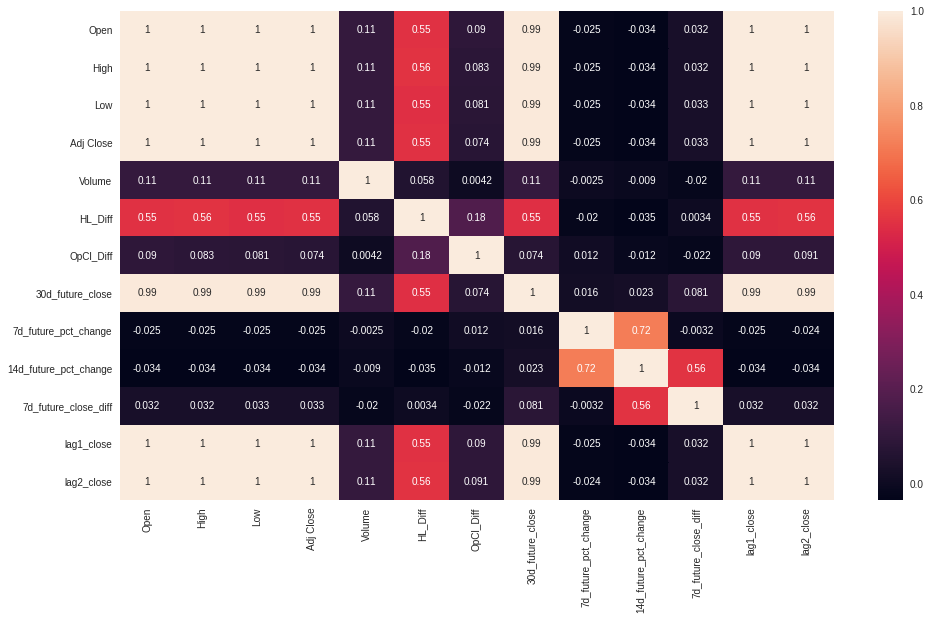

In [129]:
sns.heatmap(BSESN_df.corr(), annot=True)

In [130]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2020-04-19 07:26:08--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-04-19 07:26:08--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-04-19 07:26:08--  https://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving nchc.dl.sourceforge.ne

In [131]:
from talib import SMA, RSI
feature_names = []

# Creating moving averages and relative strength index for 14 days, a month, a quarter, a year. 
for n in [14, 30, 90, 180, 360]:

    # Creating moving averages 
    BSESN_df['ma' + str(n)] = SMA(BSESN_df['Adj Close'].values,
                              timeperiod=n) / BSESN_df['Adj Close']
    # Creating RSI 
    BSESN_df['rsi' + str(n)] = RSI(BSESN_df['Adj Close'].values, timeperiod=n)
    
    # Creating a list of feature names
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

print(feature_names)

['ma14', 'rsi14', 'ma30', 'rsi30', 'ma90', 'rsi90', 'ma180', 'rsi180', 'ma360', 'rsi360']


In [132]:
BSESN_df.isna().sum()

Open                       0
High                       0
Low                        0
Adj Close                  0
Volume                     0
HL_Diff                    0
OpCl_Diff                  0
30d_future_close           0
7d_future_pct_change       0
14d_future_pct_change      0
7d_future_close_diff       0
lag1_close                 0
lag2_close                 0
ma14                      13
rsi14                     14
ma30                      29
rsi30                     30
ma90                      89
rsi90                     90
ma180                    179
rsi180                   180
ma360                    359
rsi360                   360
dtype: int64

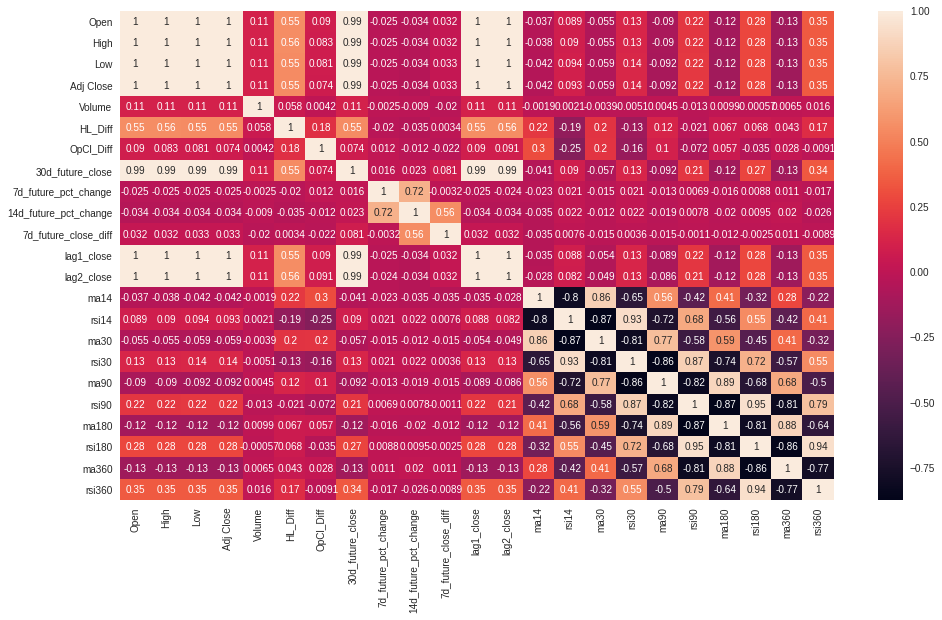

In [133]:
sns.heatmap(BSESN_df.corr(), annot = True)

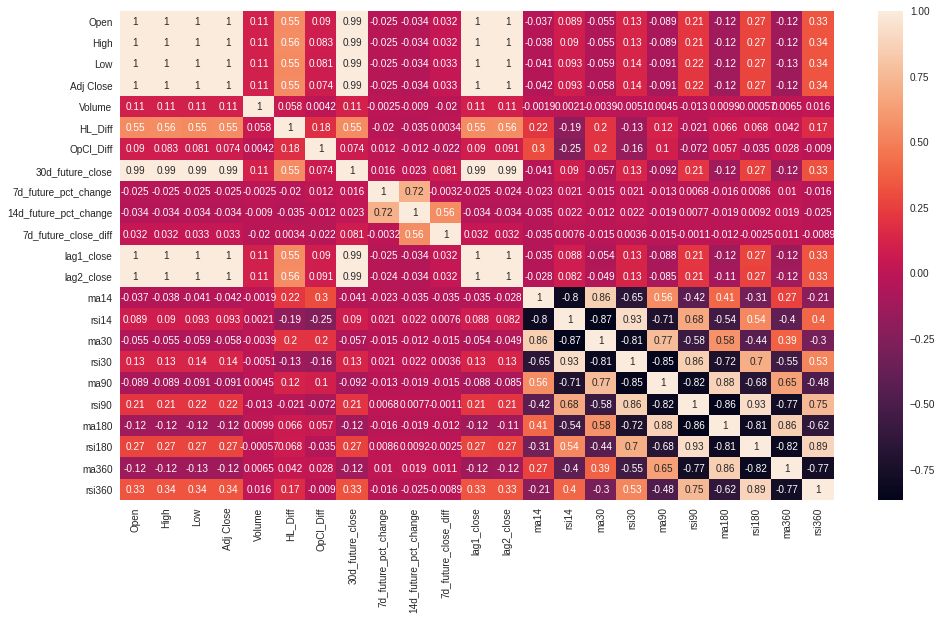

In [134]:
BSESN_df['ma14'][BSESN_df['ma14'].isna()] = BSESN_df['ma14'].fillna(BSESN_df['ma14'].mean())
BSESN_df['ma30'][BSESN_df['ma30'].isna()] = BSESN_df['ma30'].fillna(BSESN_df['ma30'].mean())
BSESN_df['ma90'][BSESN_df['ma90'].isna()] = BSESN_df['ma90'].fillna(BSESN_df['ma90'].mean())
BSESN_df['ma180'][BSESN_df['ma180'].isna()] = BSESN_df['ma180'].fillna(BSESN_df['ma180'].mean())
BSESN_df['ma360'][BSESN_df['ma360'].isna()] = BSESN_df['ma360'].fillna(BSESN_df['ma360'].mean())

BSESN_df['rsi14'][BSESN_df['rsi14'].isna()] = BSESN_df['rsi14'].fillna(BSESN_df['rsi14'].mean())
BSESN_df['rsi30'][BSESN_df['rsi30'].isna()] = BSESN_df['rsi30'].fillna(BSESN_df['rsi30'].mean())
BSESN_df['rsi90'][BSESN_df['rsi90'].isna()] = BSESN_df['rsi90'].fillna(BSESN_df['rsi90'].mean())
BSESN_df['rsi180'][BSESN_df['rsi180'].isna()] = BSESN_df['rsi180'].fillna(BSESN_df['rsi180'].mean())
BSESN_df['rsi360'][BSESN_df['rsi360'].isna()] = BSESN_df['rsi360'].fillna(BSESN_df['rsi360'].mean())

sns.heatmap(BSESN_df.corr(), annot = True)

Open                     0
High                     0
Low                      0
Adj Close                0
Volume                   0
HL_Diff                  0
OpCl_Diff                0
30d_future_close         0
7d_future_pct_change     0
14d_future_pct_change    0
7d_future_close_diff     0
lag1_close               0
lag2_close               0
ma14                     0
rsi14                    0
ma30                     0
rsi30                    0
ma90                     0
rsi90                    0
ma180                    0
rsi180                   0
ma360                    0
rsi360                   0
7d_rolling_mean          0
14d_rolling_mean         0
30d_rolling_mean         0
dtype: int64
(5507, 26)


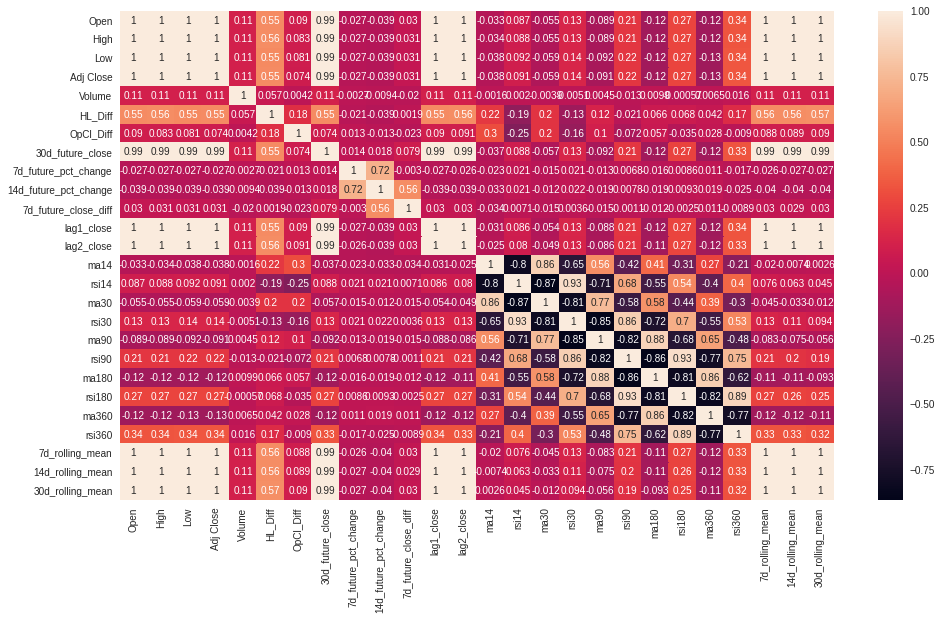

In [135]:
BSESN_df['7d_rolling_mean'] = BSESN_df['Adj Close'].rolling(window = 7).mean()
BSESN_df['14d_rolling_mean'] = BSESN_df['Adj Close'].rolling(window = 14).mean()
BSESN_df['30d_rolling_mean'] = BSESN_df['Adj Close'].rolling(window = 30).mean()

BSESN_df = BSESN_df.dropna()

sns.heatmap(BSESN_df.corr(), annot=True)
print(BSESN_df.isna().sum())
print(BSESN_df.shape)

In [0]:
#Removing Original Open High Low Data

BSESN_df = BSESN_df.drop(['Open', 'High', 'Low'], axis = 1)

### ***Final Feature Correlation***

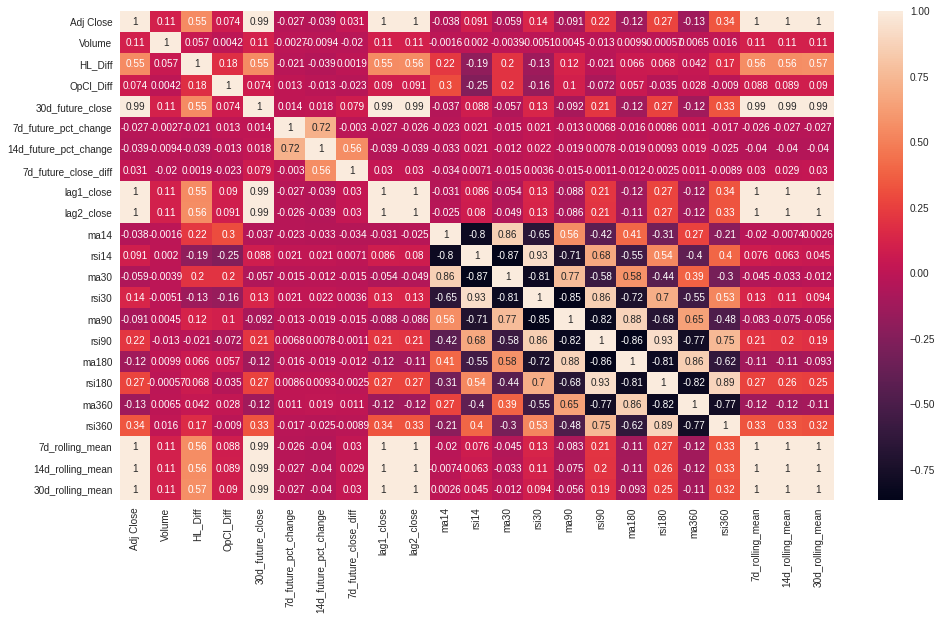

In [137]:
sns.heatmap(BSESN_df.corr(), annot = True)

## ***Train Validation and Test Data Preparation***

In [138]:
features_df = BSESN_df.drop('30d_future_close', axis = 1)

targets_df = BSESN_df['30d_future_close']

print(features_df.head(n = 10)); print('\n')
print(targets_df.head(n = 10))

              Adj Close  Volume  ...  14d_rolling_mean  30d_rolling_mean
Date                             ...                                    
1997-09-05  4032.350098   800.0  ...       4061.950753       4216.303662
1997-09-08  4087.300049   800.0  ...       4045.260027       4210.842668
1997-09-09  4031.550049   800.0  ...       4035.701451       4204.348665
1997-09-10  4045.610107   800.0  ...       4022.200038       4199.542000
1997-09-11  4010.070068   800.0  ...       4011.765032       4193.828337
1997-09-12  3995.939941   800.0  ...       4008.070033       4186.440332
1997-09-15  4018.419922   800.0  ...       4001.725725       4178.891325
1997-09-16  4012.590088   800.0  ...       3995.656442       4169.119002
1997-09-17  3928.330078   800.0  ...       3993.169311       4155.152677
1997-09-18  3884.770020   800.0  ...       3993.790022       4135.799341

[10 rows x 22 columns]


Date
1997-09-05    4154.839844
1997-09-08    4116.990234
1997-09-09    4082.699951
1997-09-10    4

In [139]:
train_size = int(len(targets_df) * 0.70)

print(train_size)

X_train = features_df[ : train_size]
X_test = features_df[train_size : ]

y_train = targets_df[ : train_size]
y_test = targets_df[train_size : ]

print(X_train.shape, y_train.shape); print(type(y_train), '\n')
print(X_test.shape, y_test.shape, '\n'); print(X_test.head(), X_test.tail())
print(X_train.head(), y_train.tail())

3854
(3854, 22) (3854,)
<class 'pandas.core.series.Series'> 

(1653, 22) (1653,) 

               Adj Close   Volume  ...  14d_rolling_mean  30d_rolling_mean
Date                               ...                                    
2013-04-22  19169.830078   8600.0  ...      18620.440709      18905.168229
2013-04-23  19179.359375   8400.0  ...      18630.327149      18897.362240
2013-04-25  19406.849609  10200.0  ...      18673.556362      18888.149544
2013-04-26  19286.720703   9600.0  ...      18729.057896      18876.166536
2013-04-29  19387.500000   9200.0  ...      18796.005720      18870.252539

[5 rows x 22 columns]                Adj Close  Volume  ...  14d_rolling_mean  30d_rolling_mean
Date                              ...                                    
2020-01-17  41945.371094  9500.0  ...      41491.562500      41262.855339
2020-01-20  41528.910156  7500.0  ...      41489.484654      41287.832682
2020-01-21  41323.808594  8900.0  ...      41494.489676      41317.121354

In [0]:
X_valid = X_train.loc['2012':]
y_valid = y_train.loc['2012':]

In [141]:
X_train = X_train.loc[:'2011-12-31']

print(X_train.tail())

y_train = y_train.loc[:'2011-12-31']

print(y_train.tail(), type(y_train))

               Adj Close   Volume  ...  14d_rolling_mean  30d_rolling_mean
Date                               ...                                    
2011-12-26  15970.750000  11800.0  ...      15887.358538      16124.448926
2011-12-27  15873.950195  10800.0  ...      15815.707799      16082.955925
2011-12-28  15727.849609  11800.0  ...      15761.394182      16044.461914
2011-12-29  15543.929688  12800.0  ...      15713.570592      16003.397266
2011-12-30  15454.919922  12800.0  ...      15683.897042      15969.837565

[5 rows x 22 columns]
Date
2011-12-26    17622.449219
2011-12-27    17707.320313
2011-12-28    17830.750000
2011-12-29    17748.689453
2011-12-30    17772.839844
Name: 30d_future_close, dtype: float64 <class 'pandas.core.series.Series'>


## ***Scaling Train and Test Data (Normalization)***

In [142]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape)

X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

print(X_train_scaled.shape, X_test_scaled.shape)

X_valid_scaled = scaler.fit_transform(X_valid)
print(X_valid_scaled.shape); print(y_valid.shape)

(3534, 22) (1653, 22)
(3534, 22) (1653, 22)
(320, 22)
(320,)


(3534,)
(3534,)
     Actual
0  0.084807
1  0.082743
2  0.080872
3  0.076894
4  0.074041


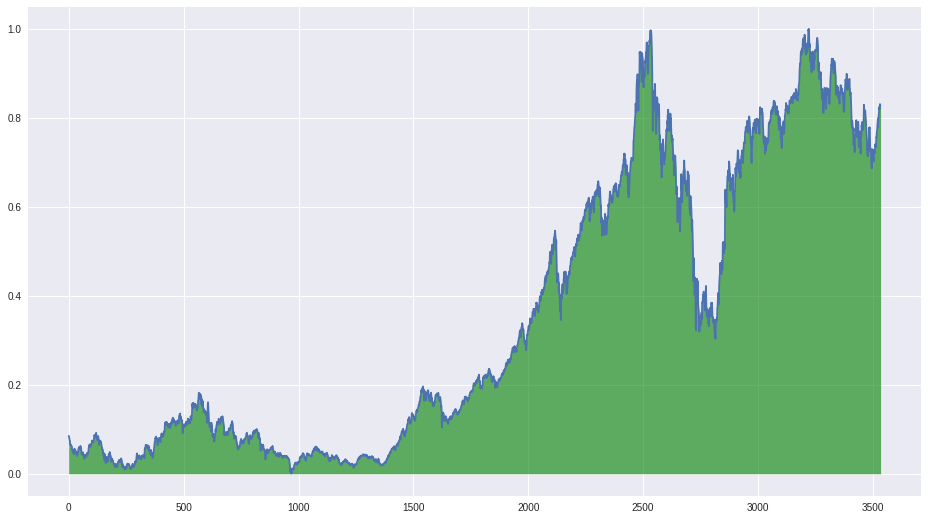

In [143]:
print(y_train.shape)

y_train_array = np.array(y_train)
y_test_array = np.array(y_test)
y_valid_array = np.array(y_valid)

res_y_train = y_train_array.reshape(-1, 1)
res_y_test = y_test_array.reshape(-1, 1)
res_y_valid = y_valid_array.reshape(-1, 1)

y_train_scaled = scaler.fit_transform(res_y_train)
y_test_scaled = scaler.fit_transform(res_y_test)
y_valid_scaled = scaler.fit_transform(res_y_valid)

y_train_scaled = np.ravel(y_train_scaled)
y_test_scaled = np.ravel(y_test_scaled)
y_valid_scaled = np.ravel(y_valid_scaled)

y_train_scaled_df = pd.DataFrame(y_train_scaled, columns=['Actual'])
print(y_train_scaled.shape); print(y_train_scaled_df.head())
plt.plot(y_train_scaled_df); plt.fill_between(y_train_scaled_df.index, y_train_scaled_df['Actual'], color = 'g', alpha = 0.6) 

# ***Modeling***

### ***Linear Model***

In [144]:
np.random.seed(42)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

linear_model = LinearRegression()
trained_linear_model = linear_model.fit(X_train_scaled, y_train_scaled)
lr_y_pred = trained_linear_model.predict(X_test_scaled)

linear_model_validation = trained_linear_model.predict(X_valid_scaled)

linear_validation_r2score = r2_score(y_valid_scaled, linear_model_validation)

linear_test_r2score = r2_score(y_test_scaled, lr_y_pred)

mse = mean_squared_error(y_test_scaled, lr_y_pred)

rmse = math.sqrt(mse)

mae = mean_absolute_error(y_test_scaled, lr_y_pred)

print('Validation R2 Score: \n', linear_validation_r2score); 
print('test R2 Score \n', linear_test_r2score); 
print('Test RMSE Score \n', rmse); print('MAE Score: \n', mae)

Validation R2 Score: 
 0.5953309425281353
test R2 Score 
 0.8220124099003214
Test RMSE Score 
 0.10627621128135875
MAE Score: 
 0.09526134420491446


In [0]:
y_test_df = pd.DataFrame(y_test_scaled)
linear_y_pred = pd.DataFrame(lr_y_pred)
linear_y_pred.index = y_test.index
linear_y_pred.columns = ['LR_Predicted']
y_test_df.index = y_test.index
y_test_df.columns = ['Actual']

***Plotting Predicted Adjusted Close price against Actual for linear model***

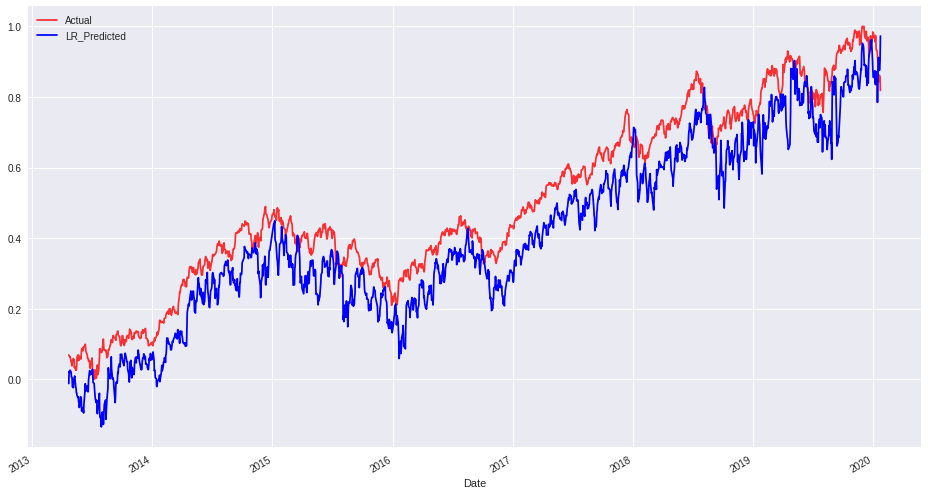

In [146]:
fig, ax = plt.subplots()
y_test_df.plot(ax=ax, color = 'r', label = 'Actual', alpha = 0.8)
linear_y_pred.plot(ax=ax, color = 'b', label = 'Predicted')
plt.legend()

### ***Decision Tree Model***

In [147]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()

Trained_dec_tree = decision_tree.fit(X_train_scaled, y_train_scaled)

for d in [3, 5, 8, 10]:
    decision_tree = DecisionTreeRegressor(max_depth = d)
    decision_tree.fit(X_train_scaled, y_train_scaled)

    print('max_depth=', str(d))
    print(decision_tree.score(X_train_scaled, y_train_scaled), '\n')
    print(decision_tree.score(X_valid_scaled, y_valid_scaled), '\n')

max_depth= 3
0.9712060184670882 

0.4792752790626211 

max_depth= 5
0.9884674773997564 

0.546156648068868 

max_depth= 8
0.9969294596109126 

0.4820033769282128 

max_depth= 10
0.9988920797067783 

0.48208495941540425 



In [148]:
decision_tree = DecisionTreeRegressor(max_depth = 5)
Trained_dec_tree = decision_tree.fit(X_train_scaled, y_train_scaled)

dtr_y_pred = Trained_dec_tree.predict(X_test_scaled)

Dectree_validation = Trained_dec_tree.predict(X_valid_scaled)

DT_validation_r2score = r2_score(y_valid_scaled, Dectree_validation)

DT_test_r2score = r2_score(y_test_scaled, dtr_y_pred)

print('DT Validation R2 Score:', DT_validation_r2score); print('\n')
print('DT test R2 Score', DT_test_r2score); print('\n')

rmse = math.sqrt(mean_squared_error(y_test_scaled, dtr_y_pred))
mae = mean_absolute_error(y_test_scaled, dtr_y_pred)

print('RMSE score: \n', rmse); print('MAE: \n', mae)

DT Validation R2 Score: 0.5336460930758526


DT test R2 Score 0.9104522018066636


RMSE score: 
 0.07538217396554833
MAE: 
 0.0596683211687077


In [0]:
dt_y_pred = pd.DataFrame(dtr_y_pred)
dt_y_pred.index = y_test.index
dt_y_pred.columns = ['DT_Predicted']

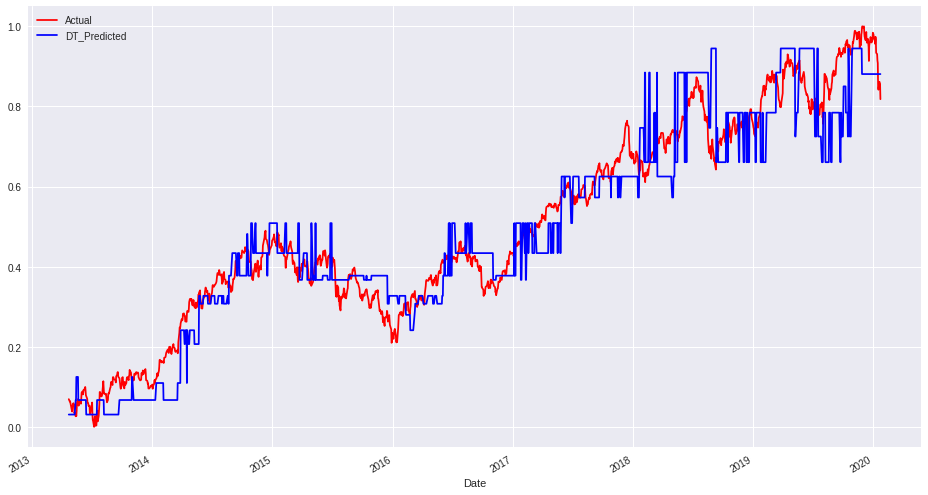

In [150]:
fig, ax = plt.subplots()
y_test_df.plot(ax=ax, color = 'r', label = 'Actual')
dt_y_pred.plot(ax=ax, color = 'b', label = 'Predicted')
plt.legend()

### ***Random Forest Model***

In [151]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train_scaled, y_train_scaled)

print(rfr.score(X_train_scaled, y_train_scaled))
print(rfr.score(X_valid_scaled, y_valid_scaled))

0.999638374368193
0.5406668808207051


In [152]:
from sklearn.model_selection import ParameterGrid


grid = {'n_estimators' : [100, 150, 220, 250], 'max_depth': [3, 5, 8, 10], 'max_features': [4, 8, 12, 15, 22], 'random_state': [42]}
test_scores = []


for g in ParameterGrid(grid):
    rfr.set_params(**g)  
    rfr.fit(X_train_scaled, y_train_scaled)
    test_scores.append(rfr.score(X_valid_scaled, y_valid_scaled))


best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

0.565627319365857 {'random_state': 42, 'n_estimators': 150, 'max_features': 15, 'max_depth': 5}


In [153]:
rfr = RandomForestRegressor(n_estimators=150, max_depth=5, max_features=15, random_state=42)
rfrmodel = rfr.fit(X_train_scaled, y_train_scaled)


rfr_validations = rfrmodel.predict(X_valid_scaled)
rfr_y_pred = rfrmodel.predict(X_test_scaled)

rfr_val_score = r2_score(y_valid_scaled, rfr_validations)
rfr_test_score = r2_score(y_test_scaled, rfr_y_pred)

mse = mean_squared_error(y_test_scaled, rfr_y_pred)
rmse = math.sqrt(mse)

mae = mean_absolute_error(y_test_scaled, rfr_y_pred)

print('Validation Score: \n', rfr_val_score)
print('Test Score: \n', rfr_test_score); print('RMSE: \n', rmse)
print('MAE: \n', mae)

Validation Score: 
 0.565627319365857
Test Score: 
 0.9369537839757572
RMSE: 
 0.06325148336223632
MAE: 
 0.050809722353996736


In [154]:
print(y_test_scaled, '\n'); 
print(rfr_y_pred)

[0.06912837 0.06710188 0.06334836 ... 0.85265564 0.85519773 0.81802058] 

[0.03693165 0.03884366 0.04797813 ... 0.84946327 0.85270113 0.86032823]


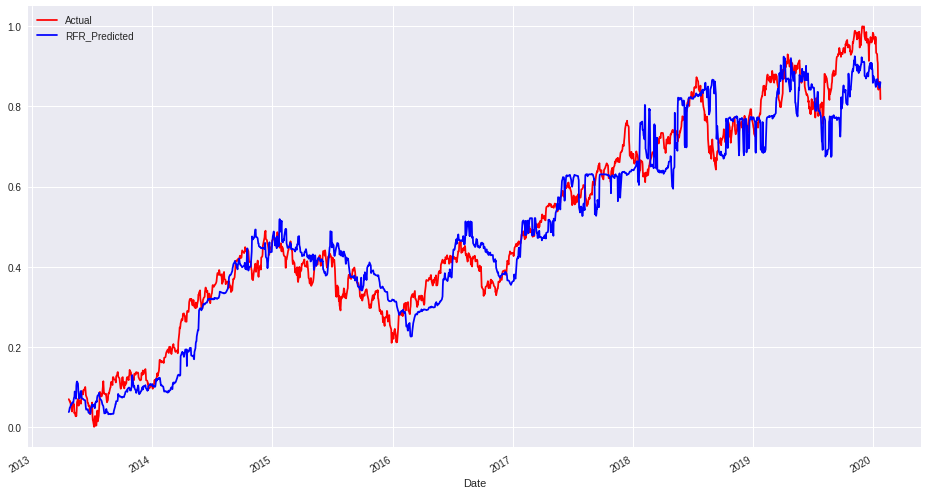

In [155]:
rfr_y_pred = pd.DataFrame(rfr_y_pred)
rfr_y_pred.index = y_test.index
rfr_y_pred.columns = ['RFR_Predicted']

fig, ax = plt.subplots()
y_test_df.plot(ax=ax, color = 'r', label = 'Actual')
rfr_y_pred.plot(ax=ax, color = 'b', label = 'Predicted')
plt.legend()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

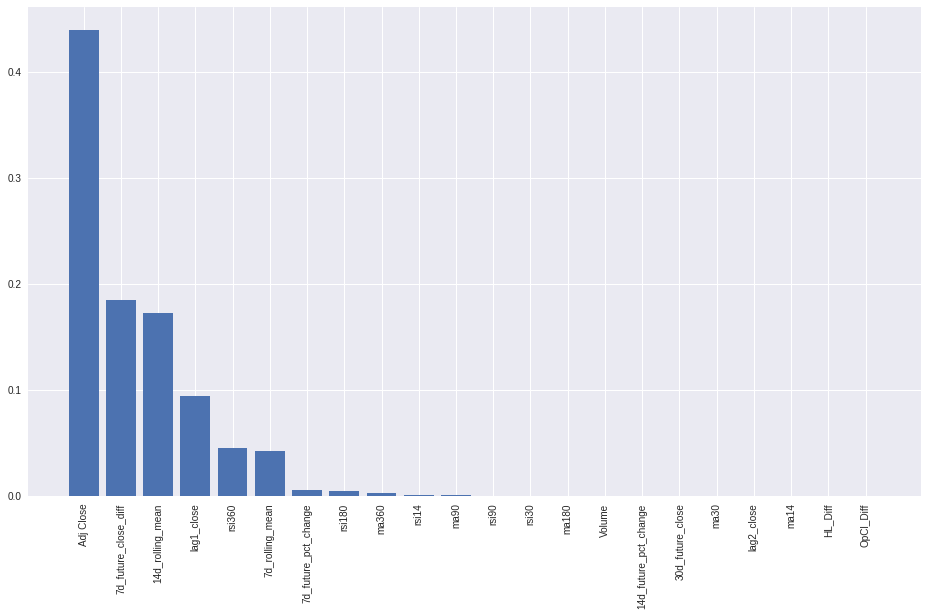

In [156]:
importances = rfr.feature_importances_

#index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]

x = range(len(importances)) 

feature_names = BSESN_df.columns

labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label = labels)

plt.xticks(rotation=90)

### ***Random Forest Model with gradient boosting***

In [157]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(max_features=15,
                                learning_rate=0.01,
                                n_estimators=150,
                                subsample=0.50,
                                random_state=42)

gbrmodel = gbr.fit(X_train_scaled, y_train_scaled)

gbr_validations = gbrmodel.predict(X_valid_scaled)
gb_y_pred = gbrmodel.predict(X_test_scaled)

print('GBR Validation score: \n', r2_score(y_valid_scaled, gbr_validations))
print('GBR Test Score: \n', r2_score(y_test_scaled, gb_y_pred))
print('RMSE: \n', math.sqrt(mean_squared_error(y_test_scaled, gb_y_pred)))
print('MAE: \n', mean_absolute_error(y_test_scaled, gb_y_pred))

GBR Validation score: 
 0.565514342234688
GBR Test Score: 
 0.8722560737685685
RMSE: 
 0.09003499238303726
MAE: 
 0.0698717404767608


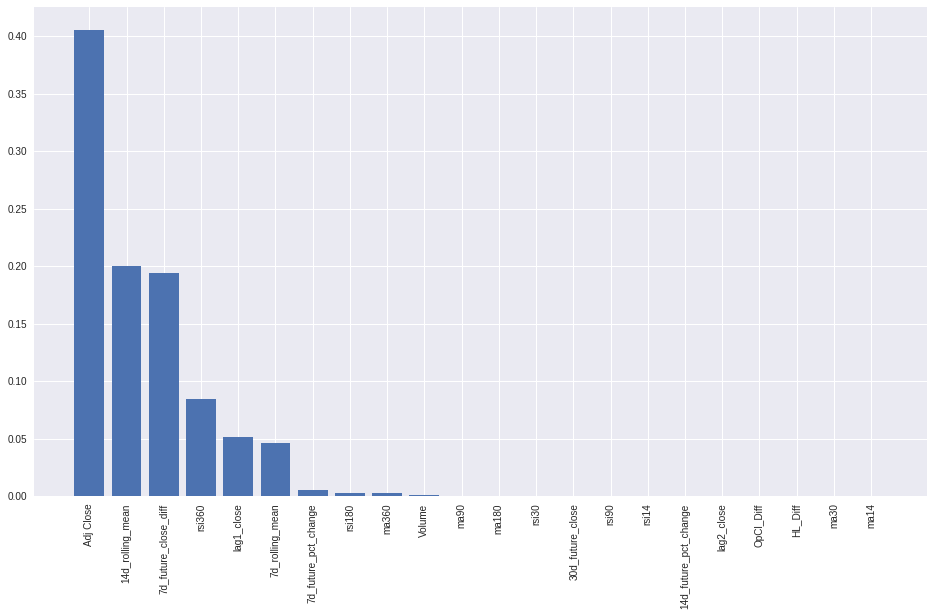

In [158]:
feature_importances = gbr.feature_importances_

#indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(len(sorted_index))

# Creating tick labels 
labels = np.array(feature_names)[sorted_index]

plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Setting the tick lables to feature names
plt.xticks(rotation=90)
plt.show()

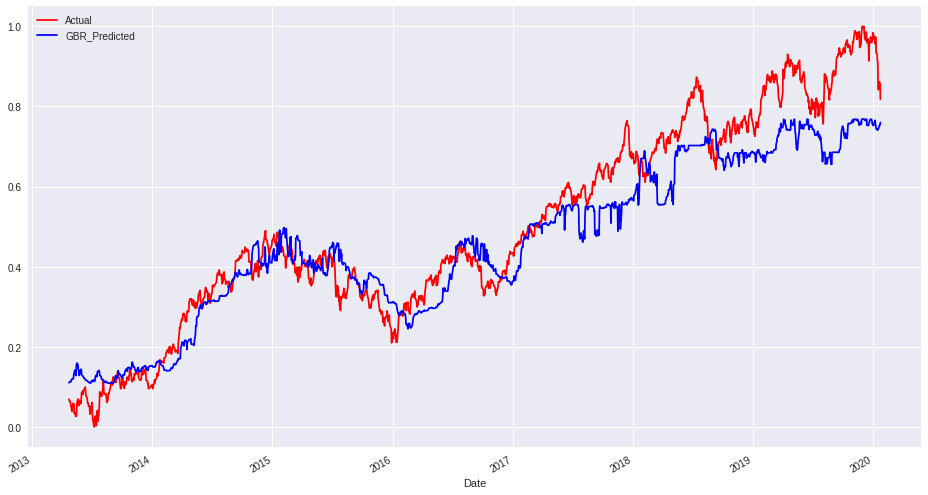

In [159]:
gbr_y_pred = pd.DataFrame(gb_y_pred)
gbr_y_pred.index = y_test.index
gbr_y_pred.columns = ['GBR_Predicted']

fig, ax = plt.subplots()
y_test_df.plot(ax=ax, color = 'r', label = 'Actual')
gbr_y_pred.plot(ax=ax, color = 'b', label = 'Predicted')
plt.legend()

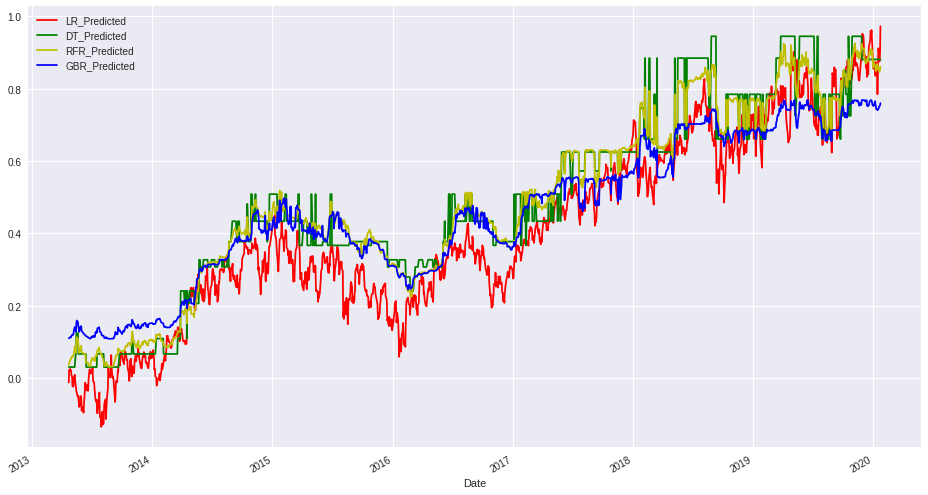

In [160]:
fig, ax = plt.subplots()
linear_y_pred.plot(ax=ax, color = 'r', label = 'Linear')
dt_y_pred.plot(ax=ax, color = 'g', label = 'DT')
rfr_y_pred.plot(ax=ax, color = 'y', label = 'RFR')
gbr_y_pred.plot(ax=ax, color = 'b', label = 'GBR')
plt.legend()

### ***Deep Neural Network***

***Without Dropout***

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 16)                368       
_________________________________________________________________
dense_52 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_53 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 5         
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________
None
Train on 3534 samples, validate on 1653 samples
Epoch 1/100
3534/3534 [==============================] - 0s 34us/step - loss: 0.3352 - val_loss: 0.4430
Epoch 2/100
3534/3534 [==============================] - 0s 4us/step - loss: 0.2927 - val_loss: 

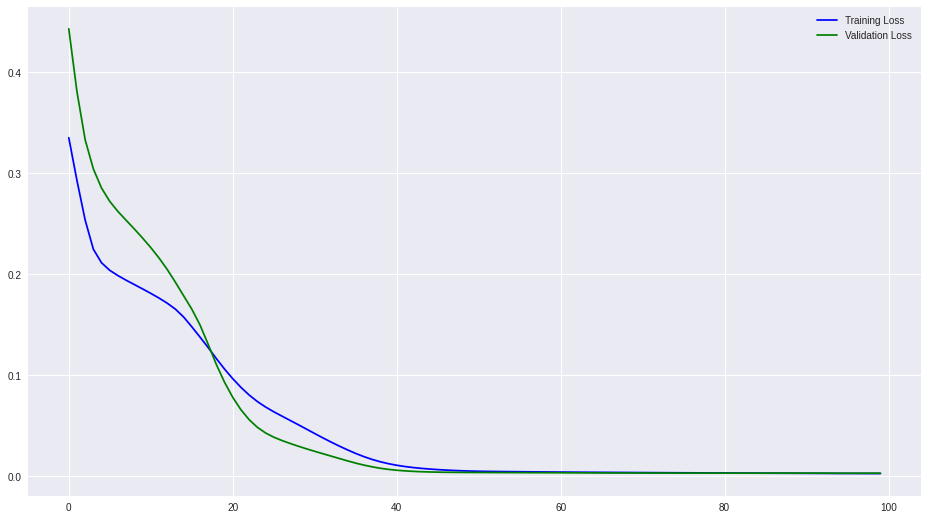

In [191]:
from keras import Sequential
from keras.layers import Dense


DNNmodel = Sequential()

DNNmodel.add(Dense(16, activation = 'relu', kernel_initializer = 'he_uniform', input_dim = X_train_scaled.shape[1]))
DNNmodel.add(Dense(8, activation = 'relu'))
DNNmodel.add(Dense(4, activation = 'relu'))
#DNNmodel.add(Dense(64, activation = 'relu'))
#DNNmodel.add(Dense(32, activation = 'relu'))
DNNmodel.add(Dense(1, activation = 'linear'))
DNNmodel.compile(optimizer = 'adam', loss = 'mse')

print(DNNmodel.summary())

Trained_DNNmodel = DNNmodel.fit(X_train_scaled, y_train_scaled, validation_data = (X_test_scaled, y_test_scaled), batch_size = 1100, epochs = 100)

DNNmodel_eval = DNNmodel.evaluate(X_train_scaled, y_train_scaled)

print(DNNmodel_eval)

nn_y_pred = DNNmodel.predict(X_test_scaled)

plt.plot(Trained_DNNmodel.history['loss'], color = 'b', label = 'Training Loss')
plt.plot(Trained_DNNmodel.history['val_loss'], color = 'g', label = 'Validation Loss')
plt.legend()

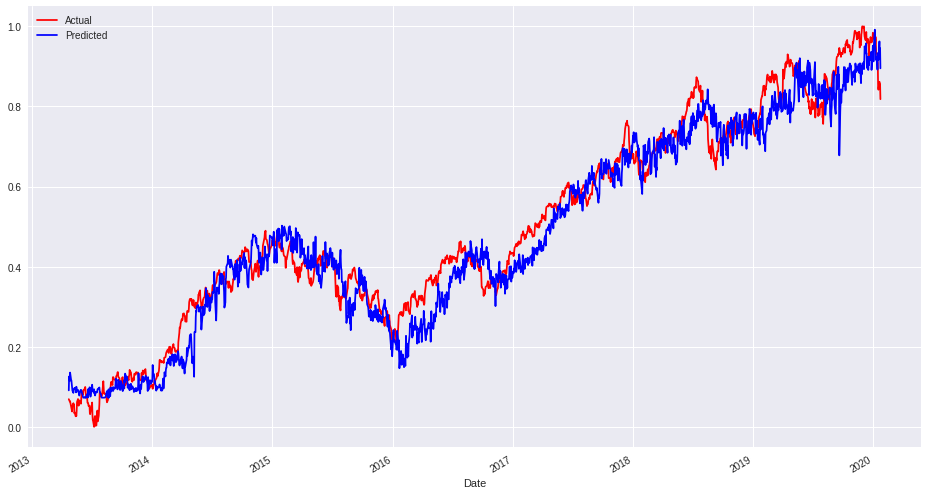

In [192]:
dnnm_y_pred = pd.DataFrame(nn_y_pred)

dnnm_y_pred.index = y_test.index

dnnm_y_pred.columns = ['Predicted']

fig, ax = plt.subplots()
y_test_df.plot(ax=ax, color = 'r', label = 'Actual')
dnnm_y_pred.plot(ax=ax, color = 'b', label = 'Predicted')
plt.legend()

In [193]:
rmse = math.sqrt(mean_squared_error(y_test_scaled, nn_y_pred))
mae = mean_absolute_error(y_test_scaled, nn_y_pred)
test_r2score = r2_score(y_test_scaled, nn_y_pred)

print('RMSE: \n', rmse, '\n MAE: \n', mae, '\n Test Score: \n', test_r2score)

RMSE: 
 0.056982423172257185 
 MAE: 
 0.04590874625422487 
 Test Score: 
 0.9488318844192992


***With Dropout***

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 16)                368       
_________________________________________________________________
dense_56 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_57 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 5         
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________
None
Train on 3534 samples, validate on 1653 samples
Epoch 1/100
3534/3534 [==============================] - 0s 39us/ste

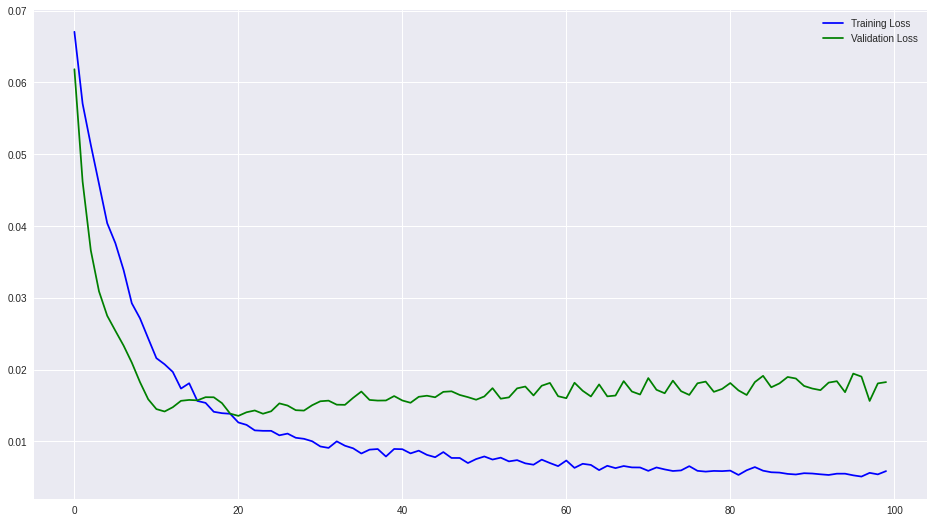

In [194]:
from keras.layers import Dropout

drpoutdnn = Sequential()
drpoutdnn.add(Dense(16, activation = 'relu', kernel_initializer = 'he_uniform', input_dim = X_train_scaled.shape[1]))
drpoutdnn.add(Dense(8, activation = 'relu'))
drpoutdnn.add(Dropout(0.1))
drpoutdnn.add(Dense(4, activation = 'relu'))
drpoutdnn.add(Dense(1, activation = 'linear'))
drpoutdnn.compile(optimizer = 'adam', loss = 'mse')

print(drpoutdnn.summary())

Trained_DNN = drpoutdnn.fit(X_train_scaled, y_train_scaled, validation_data = (X_test_scaled, y_test_scaled), batch_size = 1100, epochs = 100)

DNN_eval = drpoutdnn.evaluate(X_train_scaled, y_train_scaled)

print(DNN_eval)

nndrop_y_pred = drpoutdnn.predict(X_test_scaled)

plt.plot(Trained_DNN.history['loss'], color = 'b', label = 'Training Loss')
plt.plot(Trained_DNN.history['val_loss'], color = 'g', label = 'Validation Loss')
plt.legend()

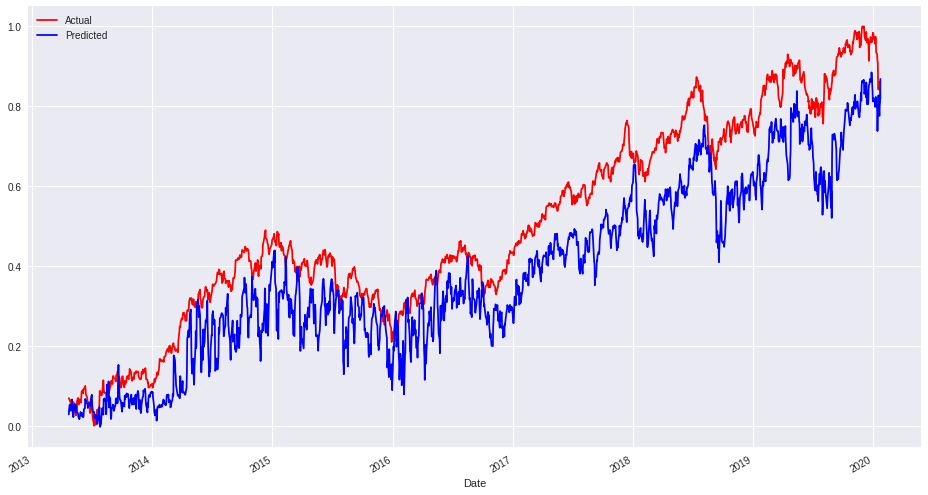

In [195]:
drpdnn_y_pred = pd.DataFrame(nndrop_y_pred)

drpdnn_y_pred.index = y_test.index

drpdnn_y_pred.columns = ['Predicted']

fig, ax = plt.subplots()
y_test_df.plot(ax=ax, color = 'r', label = 'Actual')
drpdnn_y_pred.plot(ax=ax, color = 'b', label = 'Predicted')
plt.legend()

In [196]:
rmse = math.sqrt(mean_squared_error(y_test_scaled, nndrop_y_pred))
mae = mean_absolute_error(y_test_scaled, nndrop_y_pred)
test_r2score = r2_score(y_test_scaled, nndrop_y_pred)

print('RMSE: \n', rmse, '\n MAE: \n', mae, '\n Test Score: \n', test_r2score)

RMSE: 
 0.13515620385796237 
 MAE: 
 0.11936094208589952 
 Test Score: 
 0.7121345348579731


## ***Custom Loss Function***

In [197]:
import keras.losses
import tensorflow as tf


def custom_lf(y_true, y_pred):
    penalty = 180
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = custom_lf 
print(keras.losses.sign_penalty)

<function custom_lf at 0x7f5230d0c598>


## ***Deep Neural Net with Custom Loss Function***

***Without Dropout With Custom Loss Function***

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 16)                368       
_________________________________________________________________
dense_84 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_85 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 5         
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________
None
Train on 3534 samples, validate on 1653 samples
Epoch 1/96
3534/3534 [==============================] - 0s 34us/step - loss: 0.2126 - val_loss: 0.2251
Epoch 2/96
3534/3534 [==============================] - 0s 4us/step - loss: 0.1668 - val_loss: 0.

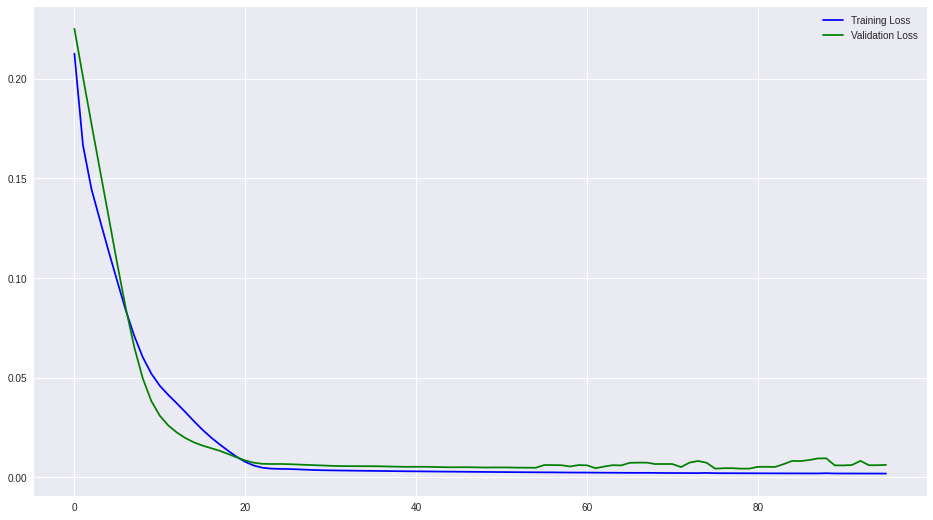

In [207]:
DNNmodel = Sequential()

DNNmodel.add(Dense(16, activation = 'relu', kernel_initializer = 'he_uniform', input_dim = X_train_scaled.shape[1]))
DNNmodel.add(Dense(8, activation = 'relu'))
DNNmodel.add(Dense(4, activation = 'relu'))
DNNmodel.add(Dense(1, activation = 'linear'))
DNNmodel.compile(optimizer = 'adam', loss = custom_lf)

print(DNNmodel.summary())

Trained_DNNmodel = DNNmodel.fit(X_train_scaled, y_train_scaled, validation_data = (X_test_scaled, y_test_scaled), batch_size = 1024, epochs = 96)

DNNmodel_eval = DNNmodel.evaluate(X_train_scaled, y_train_scaled)

print(DNNmodel_eval)

nnclf_y_pred = DNNmodel.predict(X_test_scaled)

plt.plot(Trained_DNNmodel.history['loss'], color = 'b', label = 'Training Loss')
plt.plot(Trained_DNNmodel.history['val_loss'], color = 'g', label = 'Validation Loss')
plt.legend()

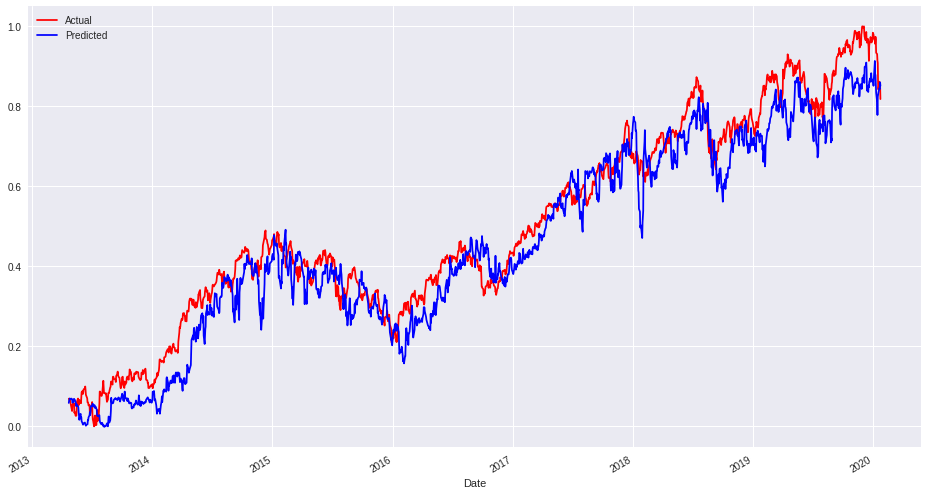

In [208]:
dnn_y_pred = pd.DataFrame(nnclf_y_pred)

dnn_y_pred.index = y_test.index

dnn_y_pred.columns = ['Predicted']

fig, ax = plt.subplots()
y_test_df.plot(ax=ax, color = 'r', label = 'Actual')
dnn_y_pred.plot(ax=ax, color = 'b', label = 'Predicted')
plt.legend()

In [209]:
rmse = math.sqrt(mean_squared_error(y_test_scaled, nnclf_y_pred))
mae = mean_absolute_error(y_test_scaled, nnclf_y_pred)
test_r2score = r2_score(y_test_scaled, nnclf_y_pred)

print('RMSE: \n', rmse, '\n MAE: \n', mae, '\n Test Score: \n', test_r2score)

RMSE: 
 0.06861926437976593 
 MAE: 
 0.05662516997174047 
 Test Score: 
 0.9257990079465551


## ***LSTM Recurrent Neural Network***

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_103 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_104 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_105 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_106 (Dense)            (None, 1)                 5         
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________
None
Train on 3534 samples, validate on 1653 samples
Epoch 1/68
3534/3534 [==============================] - 1s 223us

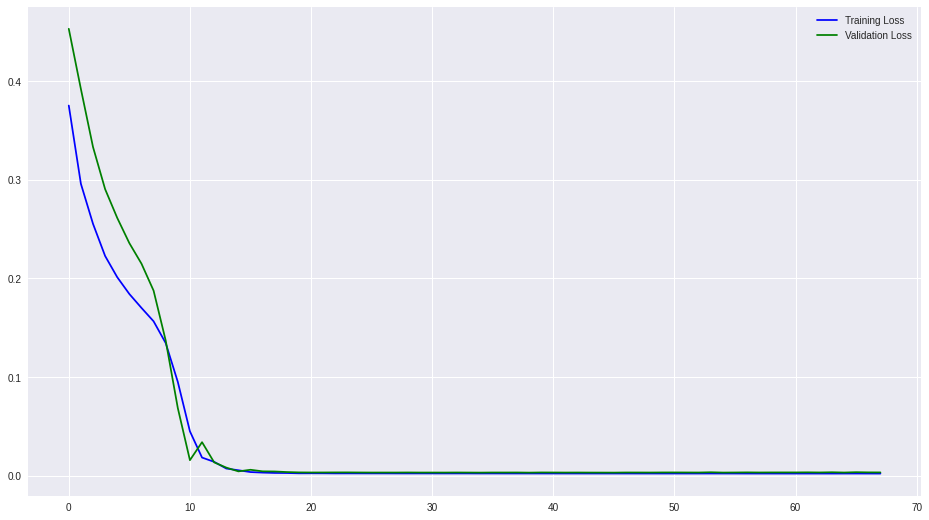

In [222]:
from keras.layers import LSTM, Embedding

model = Sequential()
model.add(LSTM(32, activation='relu', kernel_initializer='he_uniform', input_shape = (22, 1)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer = 'adam', loss = 'mse')
print(model.summary())

X_train_scaled_res = np.array(X_train_scaled).reshape((-1, 22, 1))
X_test_scaled_res = np.array(X_test_scaled).reshape((-1, 22, 1))

Trained_LSTM = model.fit(X_train_scaled_res, y_train_scaled, validation_data = (X_test_scaled_res, y_test_scaled), batch_size = 850, epochs = 68)

LSTM_eval = model.evaluate(X_train_scaled_res, y_train_scaled)

print(LSTM_eval)

rnn_y_pred = model.predict(X_test_scaled_res)

plt.plot(Trained_LSTM.history['loss'], color = 'b', label = 'Training Loss')
plt.plot(Trained_LSTM.history['val_loss'], color = 'g', label = 'Validation Loss')
plt.legend()

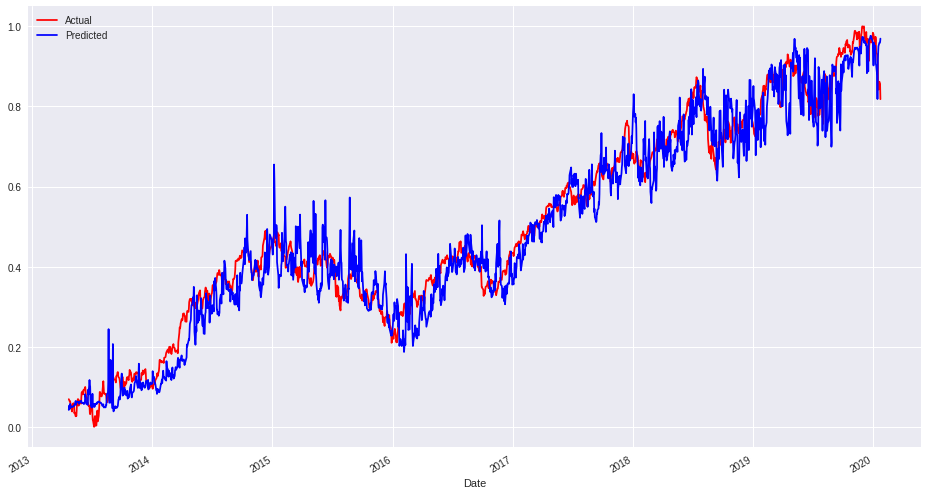

In [223]:
lstm_y_pred = pd.DataFrame(rnn_y_pred)

lstm_y_pred.index = y_test.index

lstm_y_pred.columns = ['Predicted']

fig, ax = plt.subplots()
y_test_df.plot(ax=ax, color = 'r', label = 'Actual')
lstm_y_pred.plot(ax=ax, color = 'b', label = 'Predicted')
plt.legend()

In [224]:
rmse = math.sqrt(mean_squared_error(y_test_scaled, rnn_y_pred))
mae = mean_absolute_error(y_test_scaled, rnn_y_pred)
test_r2score = r2_score(y_test_scaled, rnn_y_pred)

print('RMSE: \n', rmse, '\n MAE: \n', mae, '\n Test Score: \n', test_r2score)

RMSE: 
 0.05675592204493122 
 MAE: 
 0.04518510610212262 
 Test Score: 
 0.9492378552862523


### ***With Custom Loss Function***

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 16)                1152      
_________________________________________________________________
dense_110 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_111 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_112 (Dense)            (None, 1)                 5         
Total params: 1,329
Trainable params: 1,329
Non-trainable params: 0
_________________________________________________________________
None
Train on 3534 samples, validate on 1653 samples
Epoch 1/100
3534/3534 [==============================] - 0s 103us/step - loss: 0.0019 - val_loss: 0.0039
Epoch 2/100
3534/3534 [==============================] - 0s 106us/step - loss: 0.0019 - val

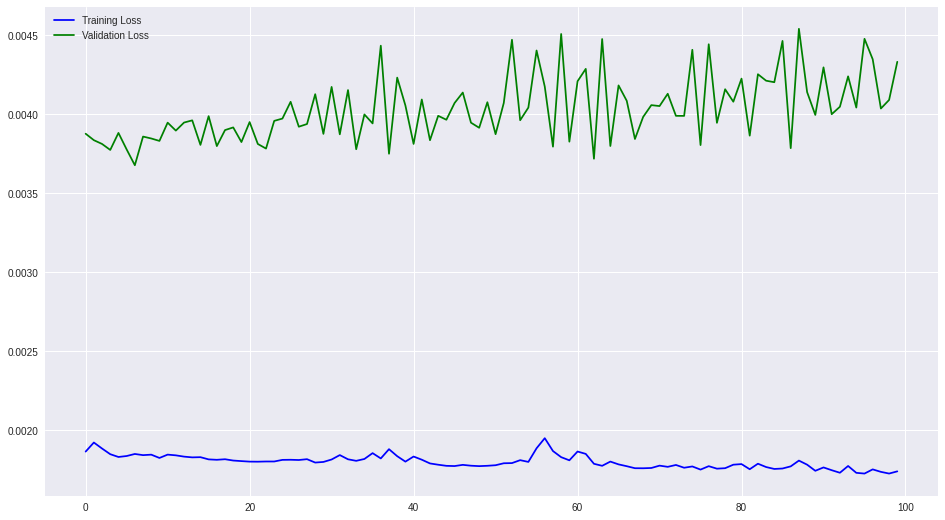

In [228]:
LSTM_clf_model = Sequential()
LSTM_clf_model.add(LSTM(16, activation='relu', kernel_initializer='he_uniform', input_shape = (22, 1)))
LSTM_clf_model.add(Dense(8, activation='relu'))
LSTM_clf_model.add(Dense(4, activation='relu'))
LSTM_clf_model.add(Dense(1, activation='linear'))
LSTM_clf_model.compile(optimizer = 'adam', loss = custom_lf)
print(LSTM_clf_model.summary())

Trained_LSTM_clf = model.fit(X_train_scaled_res, y_train_scaled, validation_data = (X_test_scaled_res, y_test_scaled), batch_size = 1100, epochs = 100)

LSTM_clf_eval = model.evaluate(X_train_scaled_res, y_train_scaled)

print(LSTM_clf_eval)

y_pred = LSTM_clf_model.predict(X_test_scaled_res)

plt.plot(Trained_LSTM_clf.history['loss'], color = 'b', label = 'Training Loss')
plt.plot(Trained_LSTM_clf.history['val_loss'], color = 'g', label = 'Validation Loss')
plt.legend()

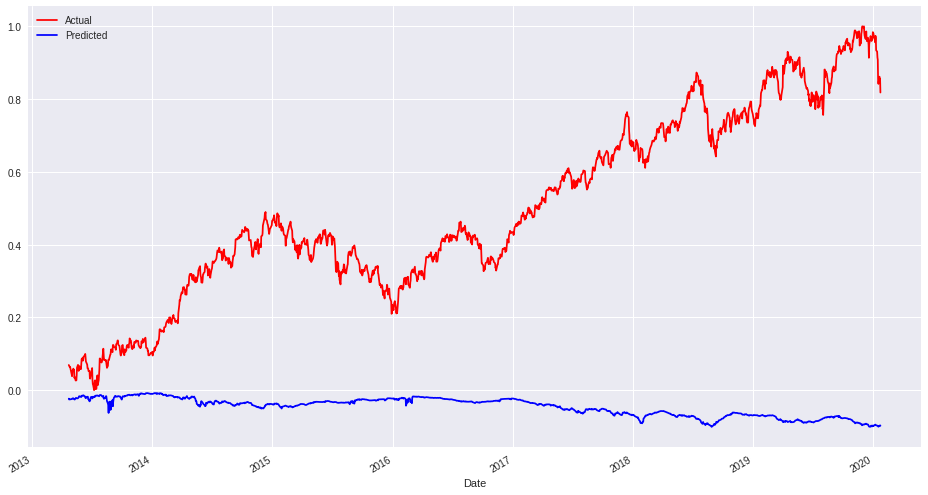

In [229]:
lstm_clfy_pred = pd.DataFrame(y_pred)

lstm_clfy_pred.index = y_test.index

lstm_clfy_pred.columns = ['Predicted']

fig, ax = plt.subplots()
y_test_df.plot(ax=ax, color = 'r', label = 'Actual')
lstm_clfy_pred.plot(ax=ax, color = 'b', label = 'Predicted')
plt.legend()

In [230]:
rmse = math.sqrt(mean_squared_error(y_test_scaled, y_pred))
mae = mean_absolute_error(y_test_scaled, y_pred)
test_r2score = r2_score(y_test_scaled, y_pred)

print('RMSE: \n', rmse, '\n MAE: \n', mae, '\n Test Score: \n', test_r2score)

RMSE: 
 0.6095557111780724 
 MAE: 
 0.5441581487785526 
 Test Score: 
 -4.855236011812


# ***Model Prediction Stack***


### ***LR - DNN Prediction Stack***

In [246]:
nnclf_y_pred = np.ravel(dnnm_y_pred)
print(nnclf_y_pred.shape); print(lr_y_pred.shape)

df1 = pd.DataFrame(nnclf_y_pred)
df2 = pd.DataFrame(lr_y_pred)
print(len(df1.index)); print(len(df2.index))

lrdnn_y_pred = np.mean(np.hstack((df2, df1)), axis = 1)

lrdnn_test_r2scr = r2_score(y_test_scaled, lrdnn_y_pred)
rmse = math.sqrt(mean_squared_error(y_test_scaled, lrdnn_y_pred))
mae = mean_absolute_error(y_test_scaled, lrdnn_y_pred)

print('Test Score:', lrdnn_test_r2scr, '\n', 'RMSE:', rmse, '\n', 'MAE:', mae)

(1653,)
(1653,)
1653
1653
Test Score: 0.9175682262030824 
 RMSE: 0.07232501372230701 
 MAE: 0.06251699992400334


### ***LR - RNN Prediction Stack***

In [247]:
rnn_y_pred = np.ravel(rnn_y_pred)

df3 = pd.DataFrame(rnn_y_pred)

lrrnn_y_pred = np.mean(np.hstack((df2, df3)), axis = 1)

lrrnn_test_r2scr = r2_score(y_test_scaled, lrrnn_y_pred)

rmse = math.sqrt(mean_squared_error(y_test_scaled, lrrnn_y_pred))

mae = mean_absolute_error(y_test_scaled, lrrnn_y_pred)

print('Test Score:', lrrnn_test_r2scr, '\n', 'RMSE:', rmse, '\n', 'MAE:', mae)

Test Score: 0.9181704536241871 
 RMSE: 0.07206033452690108 
 MAE: 0.061132421732336135


### ***RF - DNN Prediction Stack***

In [248]:
df4 = pd.DataFrame(rfr_y_pred)

rfdnn_y_pred = np.mean(np.hstack((df4, df1)), axis = 1)

rfdnn_test_r2scr = r2_score(y_test_scaled, rfdnn_y_pred)

rmse = math.sqrt(mean_squared_error(y_test_scaled, rfdnn_y_pred))

mae = mean_absolute_error(y_test_scaled, rfdnn_y_pred)

print('Test Score:', rfdnn_test_r2scr, '\n', 'RMSE:', rmse, '\n', 'MAE:', mae)

Test Score: 0.9539275302369862 
 RMSE: 0.05407069463933502 
 MAE: 0.043871628195863814


### ***RF - RNN Prediction Stack***

In [249]:
rfrnn_y_pred = np.mean(np.hstack((df4, df3)), axis = 1)

rfrnn_test_r2scr = r2_score(y_test_scaled, rfrnn_y_pred)

rmse = math.sqrt(mean_squared_error(y_test_scaled, rfrnn_y_pred))

mae = mean_absolute_error(y_test_scaled, rfrnn_y_pred)

print('Test Score:', rfrnn_test_r2scr, '\n', 'RMSE:', rmse, '\n', 'MAE:', mae)

Test Score: 0.956770026142759 
 RMSE: 0.052376164092465316 
 MAE: 0.04225066386458218


### ***GBR - DNN Prediction Stack***

In [250]:
df5 = pd.DataFrame(gb_y_pred)

gbdnn_y_pred = np.mean(np.hstack((df5, df1)), axis = 1)

gbdnn_test_r2scr = r2_score(y_test_scaled, gbdnn_y_pred)

rmse = math.sqrt(mean_squared_error(y_test_scaled, gbdnn_y_pred))

mae = mean_absolute_error(y_test_scaled, gbdnn_y_pred)

print('Test Score:', gbdnn_test_r2scr, '\n', 'RMSE:', rmse, '\n', 'MAE:', mae)

Test Score: 0.9318004665717052 
 RMSE: 0.0657857611443877 
 MAE: 0.052019702261708246


### ***GBR - LSTM Prediction Stack***

In [251]:
gbrnn_y_pred = np.mean(np.hstack((df5, df3)), axis = 1)

gbrnn_test_r2scr = r2_score(y_test_scaled, gbrnn_y_pred)

rmse = math.sqrt(mean_squared_error(y_test_scaled, gbrnn_y_pred))

mae = mean_absolute_error(y_test_scaled, gbrnn_y_pred)

print('Test Score:', gbrnn_test_r2scr, '\n', 'RMSE:', rmse, '\n', 'MAE:', mae)

Test Score: 0.9385382689998942 
 RMSE: 0.06245160380186038 
 MAE: 0.049489459725174725


### ***Deep - LSTM Prediction Stack (DLSTM)***

In [252]:
drnn_y_pred = np.mean(np.hstack((df1, df3)), axis = 1)

drnn_test_r2scr = r2_score(y_test_scaled, drnn_y_pred)

rmse = math.sqrt(mean_squared_error(y_test_scaled, drnn_y_pred))

mae = mean_absolute_error(y_test_scaled, drnn_y_pred)

print('Test Score:', drnn_test_r2scr, '\n', 'RMSE:', rmse, '\n', 'MAE:', mae)

Test Score: 0.9582181564294534 
 RMSE: 0.05149143574081639 
 MAE: 0.04179635700889733


## ***RFLSTM-DeepLSTM Prediction Stack (RF-DLSTM)***

In [254]:
df6 = pd.DataFrame(rfdnn_y_pred); df7 = pd.DataFrame(rfrnn_y_pred)
df8 = pd.DataFrame(drnn_y_pred) 

mstack_y_pred = np.mean(np.hstack((df8, df7, df6)), axis = 1)

mstack_test_r2scr = r2_score(y_test_scaled, mstack_y_pred)

rmse = math.sqrt(mean_squared_error(y_test_scaled, mstack_y_pred))

mae = mean_absolute_error(y_test_scaled, mstack_y_pred)

print('Test Score:', mstack_test_r2scr, '\n', 'RMSE:', rmse, '\n', 'MAE:', mae)

Test Score: 0.9600710364319176 
 RMSE: 0.05033675567565748 
 MAE: 0.04080267181612335


## ***Plotting the best of Prediction Stacks***

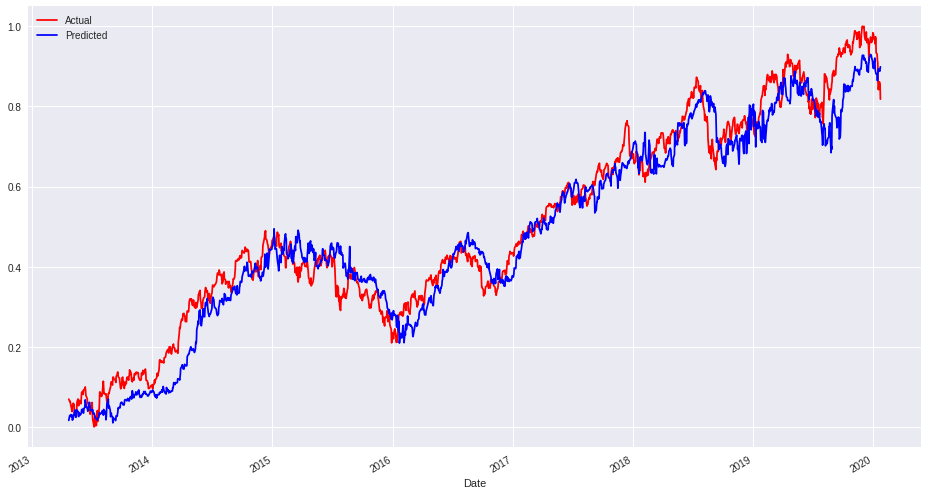

In [185]:
fstack_y_pred = pd.DataFrame(mstack_y_pred)

fstack_y_pred.index = y_test.index

fstack_y_pred.columns = ['Predicted']

fig, ax = plt.subplots()
y_test_df.plot(ax=ax, color = 'r', label = 'Actual')
fstack_y_pred.plot(ax=ax, color = 'b', label = 'Predicted')
plt.legend()